<a href="https://colab.research.google.com/github/AlfonsoMoralesErosa/OGms_PM/blob/main/AJME_LoanDefault_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**
 - When a user defaults a loan is a major risk for the bank and for the user itself, the bank looses major profits, and it may not regain what it was loaned. And the user will be faced with bad credit score and potentially not getting any other loan in the future. The process to decide if the loan is given, or not, is prone to errors due human biases and poor judgment, but using technology, data, and systems modeling this can be avoided.

### **The objective:**

 - The objective is to predict if a user will default on the loan or not.

### **The key questions:**

- What are the key questions that need to be answered?
* Will the user pay the loan, or is he prone to default?
* What is the profile of a user with no chance of defaulting?
* Does the user has payed all his loans?

### **The problem formulation**:

- As a data sicentist the goal is to analyze the given data and create a machine learning classification model capable of predicting if a client will default on a loan or not.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

# **Import the necessary libraries and Data**

In [ ]:
#dataframes and data manipulation
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import math
#sklearn to build ML models
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# To encode categorical variables
from sklearn.preprocessing import LabelEncoder
#for hyperparameter tunning
from sklearn.model_selection import GridSearchCV
#for evaluation of the models
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

# **Data Overview**

## Reading the Dataset

In [ ]:
#mount google drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data from google drive
data = pd.read_csv('/content/drive/MyDrive/DSPM_MIT/Projects/Loan_Default/hmeq.csv')
df=data.copy()

In [ ]:
df.shape

(5960, 13)

In [ ]:
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 5960 rows and 13 columns


In [ ]:
# head of the data
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [ ]:
# tail of the data
df.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

* from the head of the data, we can see that Debt to income ratio has some missing values, we need to investigate why? and at least one user has many NAN values, we also need to investigate why in order to drop them or treat them.
* 5960 rows of data, and 13 columns.

In [ ]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


* There are only 2 object/string, JOB and REASON.
* BAD is a flag variable, or categorical, indicating if the user has defaulted on the loan (1) or if it has payed the loan (0).
* There are a lot of missing values, althoug none of them seem to be greater than 50% of the data, so i will try to treat them.

In [ ]:
df['BAD'].value_counts() #value counts of the default rate variable

BAD
0    4771
1    1189
Name: count, dtype: int64

In [ ]:
df['REASON'].value_counts()# value counts of reason of loan petition

REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64

In [ ]:
df['JOB'].value_counts()#value counts of job of the clients

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

In [ ]:
#value counts of Number of delinquent credit lines
# (a line when a borrower does not make the minimum required payments 30 to 60 days past due)
df['DELINQ'].value_counts()

DELINQ
0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: count, dtype: int64

Only 13 values in DELINQ, could be seen as categorys

In [ ]:
df['DEROG'].value_counts()# Number of major derogatory reports

DEROG
0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: count, dtype: int64

Only 10 values in DEROG, could be seen as categorys

In [ ]:
# dividing categorical columns and numerical columns
cat_col = list(df.select_dtypes("object").columns)#categorical variables
num_col = list(df.select_dtypes("number").columns)#numerical variables
cols= list(df.columns)#all columns in list
#categorical variables + 'DEROG','DELINQ','NINQ'
cat_col_=['JOB','REASON','DEROG','DELINQ','NINQ']
#numerical variables - 'DEROG','DELINQ','NINQ'
num_col_=['LOAN','MORTDUE','VALUE','YOJ','CLAGE','CLNO','DEBTINC']

In [ ]:
# value counts for each categorical column in pctg
for column in cat_col_:
    print(f'{column} in percentage')
    print(df[column].value_counts()*100/df.shape[0])
    print("----" * 10)

JOB in percentage
JOB
Other      40.067114
ProfExe    21.409396
Office     15.906040
Mgr        12.869128
Self        3.238255
Sales       1.828859
Name: count, dtype: float64
----------------------------------------
REASON in percentage
REASON
DebtCon    65.906040
HomeImp    29.865772
Name: count, dtype: float64
----------------------------------------
DEROG in percentage
DEROG
0.0     75.956376
1.0      7.298658
2.0      2.684564
3.0      0.973154
4.0      0.385906
5.0      0.251678
6.0      0.251678
7.0      0.134228
8.0      0.100671
9.0      0.050336
10.0     0.033557
Name: count, dtype: float64
----------------------------------------
DELINQ in percentage
DELINQ
0.0     70.117450
1.0     10.973154
2.0      4.194631
3.0      2.164430
4.0      1.308725
5.0      0.637584
6.0      0.453020
7.0      0.218121
8.0      0.083893
10.0     0.033557
11.0     0.033557
15.0     0.016779
12.0     0.016779
13.0     0.016779
Name: count, dtype: float64
----------------------------------------
NI

In [ ]:
#Mean of the numerical columns
for column in num_col_:
    print(f'Average of {column} is :')
    print(df[column].mean())
    print("----" * 10)

Average of LOAN is :
18607.96979865772
----------------------------------------
Average of MORTDUE is :
73760.817199559
----------------------------------------
Average of VALUE is :
101776.04874145007
----------------------------------------
Average of YOJ is :
8.922268135904499
----------------------------------------
Average of CLAGE is :
179.76627518656605
----------------------------------------
Average of CLNO is :
21.29609620076682
----------------------------------------
Average of DEBTINC is :
33.779915348721126
----------------------------------------


In [ ]:
#Checking for missing values
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
df.isnull().sum()*100/df.shape[0]

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [ ]:
df[cat_col_].isnull().sum()

JOB       279
REASON    252
DEROG     708
DELINQ    580
NINQ      510
dtype: int64

In [ ]:
df[num_col_].isnull().sum()

LOAN          0
MORTDUE     518
VALUE       112
YOJ         515
CLAGE       308
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

In [ ]:
#Value counts of BAD and number of delinquent credit lines
df.groupby("BAD")['DELINQ'].value_counts()*100/df.shape[0]

BAD  DELINQ
0    0.0       60.335570
     1.0        7.248322
     2.0        2.315436
     3.0        0.973154
     4.0        0.536913
     5.0        0.117450
1    0.0        9.781879
     1.0        3.724832
     2.0        1.879195
     3.0        1.191275
     4.0        0.771812
     5.0        0.520134
     6.0        0.453020
     7.0        0.218121
     8.0        0.083893
     10.0       0.033557
     11.0       0.033557
     12.0       0.016779
     13.0       0.016779
     15.0       0.016779
Name: count, dtype: float64

Clients who defaulted on a loan had a range of DELINQ from 0-15. Meanwhile those who repaid their loan had a range of DELINQ of 0-5.

In [ ]:
#Value counts of BAD column and derogatory cases (late payment)
df.groupby("BAD")["DEROG"].value_counts()

BAD  DEROG
0    0.0      3773
     1.0       266
     2.0        78
     3.0        15
     5.0         8
     6.0         5
     4.0         5
1    0.0       754
     1.0       169
     2.0        82
     3.0        43
     4.0        18
     6.0        10
     7.0         8
     5.0         7
     8.0         6
     9.0         3
     10.0        2
Name: count, dtype: int64

In [ ]:
#Percentage Value counts of BAD column and derogatory cases (late payment)
df.groupby("BAD")["DEROG"].value_counts()*100/df.shape[0]

BAD  DEROG
0    0.0      63.305369
     1.0       4.463087
     2.0       1.308725
     3.0       0.251678
     5.0       0.134228
     6.0       0.083893
     4.0       0.083893
1    0.0      12.651007
     1.0       2.835570
     2.0       1.375839
     3.0       0.721477
     4.0       0.302013
     6.0       0.167785
     7.0       0.134228
     5.0       0.117450
     8.0       0.100671
     9.0       0.050336
     10.0      0.033557
Name: count, dtype: float64

Similarly, clients who defaulted on a loan had a range of DEROG from 0-10. Meanwhile those who repaid their loan had a range of DEROG of 0-6.

In [ ]:
df.groupby("BAD")["JOB"].value_counts()*100/df.shape[0]

BAD  JOB    
0    Other      30.771812
     ProfExe    17.852349
     Office     13.808725
     Mgr         9.865772
     Self        2.265101
     Sales       1.191275
1    Other       9.295302
     ProfExe     3.557047
     Mgr         3.003356
     Office      2.097315
     Self        0.973154
     Sales       0.637584
Name: count, dtype: float64

In [ ]:
# Group by loandefault and categorical variables and count missing values for each group
df.groupby("BAD")[cat_col_].apply(lambda x: (x.isnull().sum()*100/x.shape[0]).round(2)).reset_index()

BAD   JOB  REASON  DEROG  DELINQ  NINQ
0    0  5.37    4.28  13.02   10.65  9.12
1    1  1.93    4.04   7.32    6.06  6.31

In [ ]:
# Group by loandefault and numerical variables and count missing values for each group
df.groupby("BAD")[num_col_].apply(lambda x: (x.isnull().sum()*100/x.shape[0]).round(2)).reset_index()

BAD  LOAN  MORTDUE  VALUE   YOJ  CLAGE  CLNO  DEBTINC
0    0   0.0     8.64   0.15  9.43   4.82  3.54    10.08
1    1   0.0     8.92   8.83  5.47   6.56  4.46    66.11

DEBTINC has a significant proportion of missing values for default=1. VALUE on the other hand has a very few proportion of missing values on repaid loan =0. This variables seem to be of importance.

## Summary Statistics

In [ ]:
df.describe().T

count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Observations summary statistics**

* There are only 2 object/string, JOB and REASON.
* DEROG, DELINQ, and NINQ, could be seen/treated as categorical variables. So we have a cat_col_=['JOB','REASON','DEROG','DELINQ','NINQ'].
* BAD is a flag variable, or categorical, indicating if the user has defaulted on the loan (1) or if it has payed the loan (0).
* The numerical variables are num_col_=['LOAN','MORTDUE','VALUE','YOJ','CLAGE','CLNO','DEBTINC'].
* There are a lot of missing values, althoug none of them seem to be greater than 50% of the data, so i will try to treat them.
* Clients who defaulted on a loan had a range of DELINQ from 0-15. Meanwhile those who repaid their loan had a range of DELINQ of 0-5.
* Similarly, clients who defaulted on a loan had a range of DEROG from 0-10. Meanwhile those who repaid their loan had a range of DEROG of 0-6.
* DEBTINC has a significant proportion of missing values for default=1. VALUE on the other hand has a very few proportion of missing values on repaid loan =0. This variables seem to be of importance.

# **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**


### Numerical Variables
 * LOAN
 * MORTDUE
 * VALUE
 * YOJ
 * CLAGE
 * CLNO
 * DEBTINC

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )
                     # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

    print(f'The number of missing values in {feature} is {data[feature].isnull().sum()}')

Range and distribution of Loan variable

The number of missing values in LOAN is 0


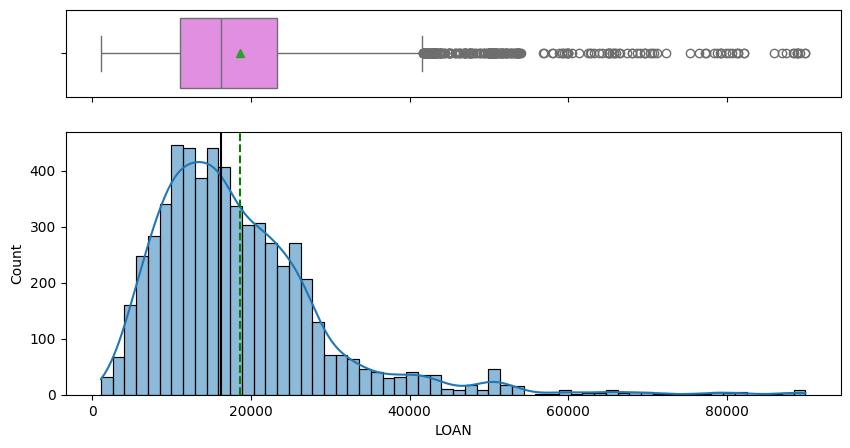

In [ ]:
histogram_boxplot(df, 'LOAN', kde=True, bins=60)

Range and distribution of amount due to Mortgage variable

The number of missing values in MORTDUE is 518


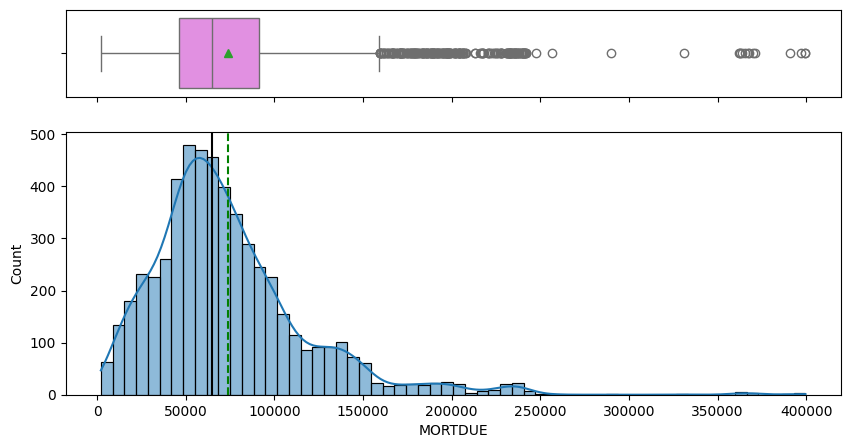

In [ ]:
histogram_boxplot(df, 'MORTDUE', kde=True, bins=60)

Range and distribution of Value of current property variable

The number of missing values in VALUE is 112


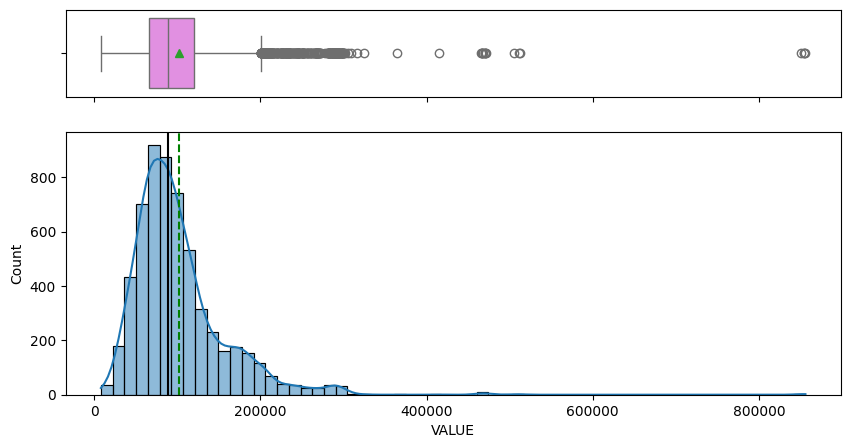

In [ ]:
histogram_boxplot(df, 'VALUE', kde=True, bins=60)

Range and distribution of Years at current Job variable

The number of missing values in YOJ is 515


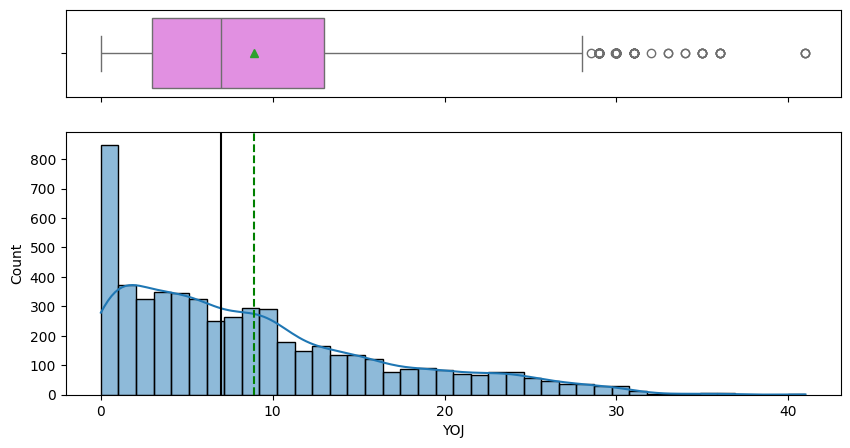

In [ ]:
histogram_boxplot(df, 'YOJ', kde=True, bins=40)

In [ ]:
#histogram_boxplot(df, 'DEROG', kde=True, bins=10)

In [ ]:
#histogram_boxplot(df, 'DELINQ', kde=True, bins=14)

Range and distribution of Age of oldest credit line variable

The number of missing values in CLAGE is 308


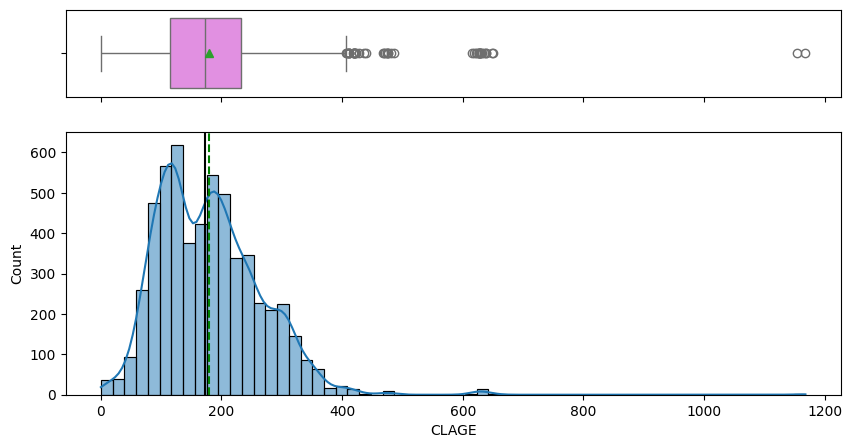

In [ ]:
histogram_boxplot(df, 'CLAGE', kde=True, bins=60)

Range and distribution of Number of credit lines inquiries variable.

The number of missing values in NINQ is 510


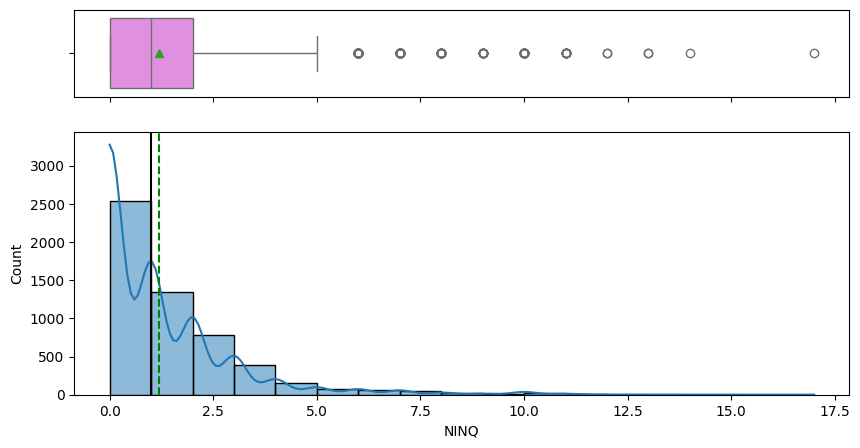

In [ ]:
histogram_boxplot(df, 'NINQ', kde=True, bins=17)

Range and distribution of Number of credit lines.

The number of missing values in CLNO is 222


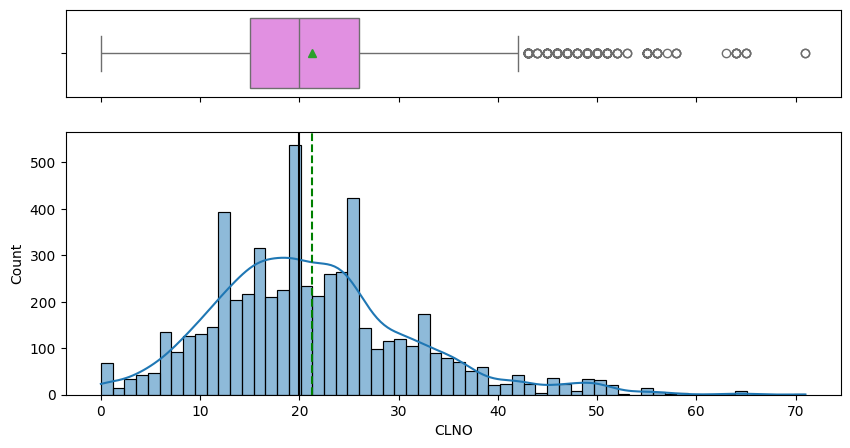

In [ ]:
histogram_boxplot(df, 'CLNO', kde=True, bins=60)

Range and distribution of Debt-to-Income ratio variable.

The number of missing values in DEBTINC is 1267


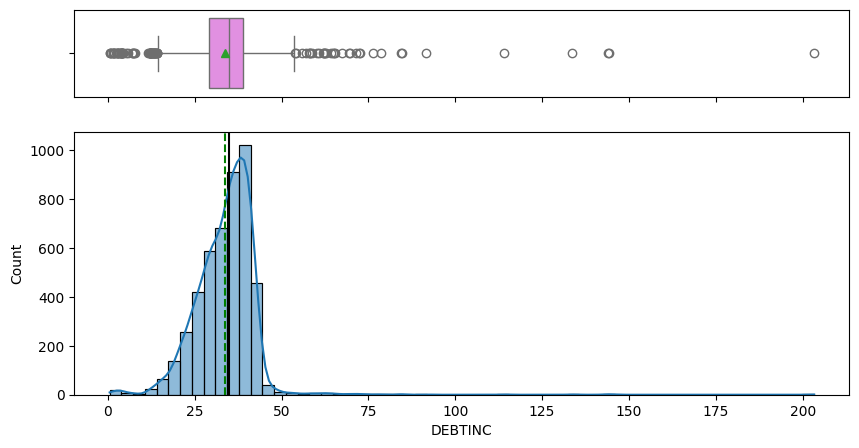

In [ ]:
histogram_boxplot(df, 'DEBTINC', kde=True, bins=60)

### Categorical Variables
 * JOB
 * REASON
 * DELINQ
 * DEROG
 * NINQ

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().sort_values(ascending=False).index,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot
    print(f'The number of missing values in {feature} is {data[feature].isnull().sum()}')

Counts of Number of delinquent credit lines

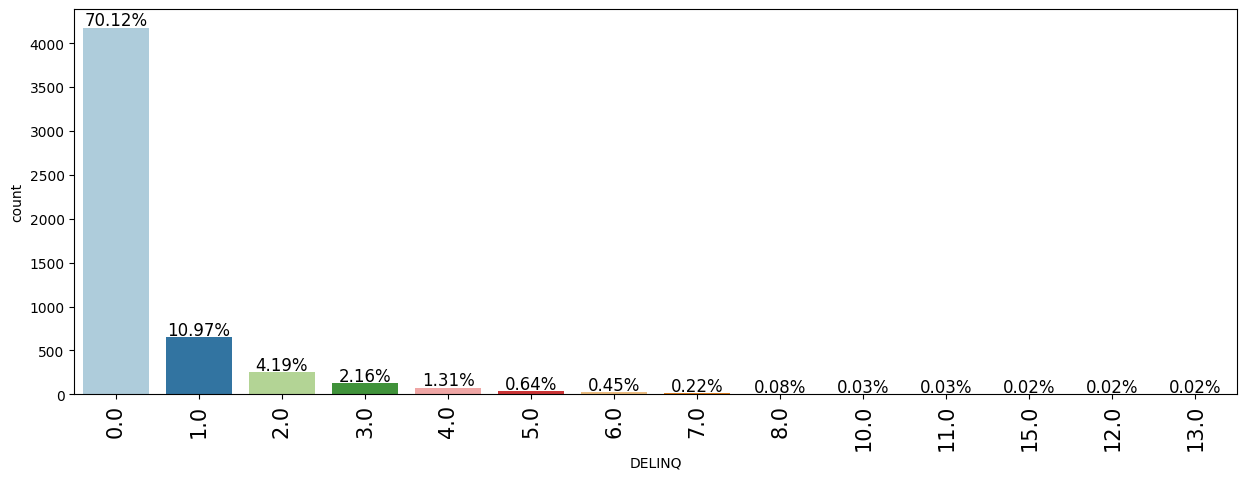

The number of missing values in DELINQ is 580


In [ ]:
labeled_barplot(df, 'DELINQ',  perc = True)

Counts of Number of derogatory reports

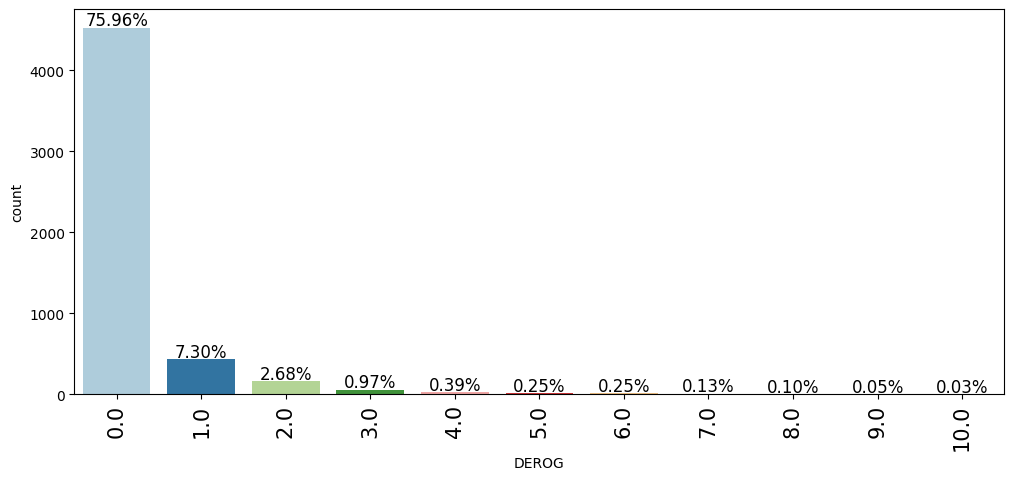

The number of missing values in DEROG is 708


In [ ]:
labeled_barplot(df, 'DEROG',  perc = True)

Counts of Number of credit inquiries

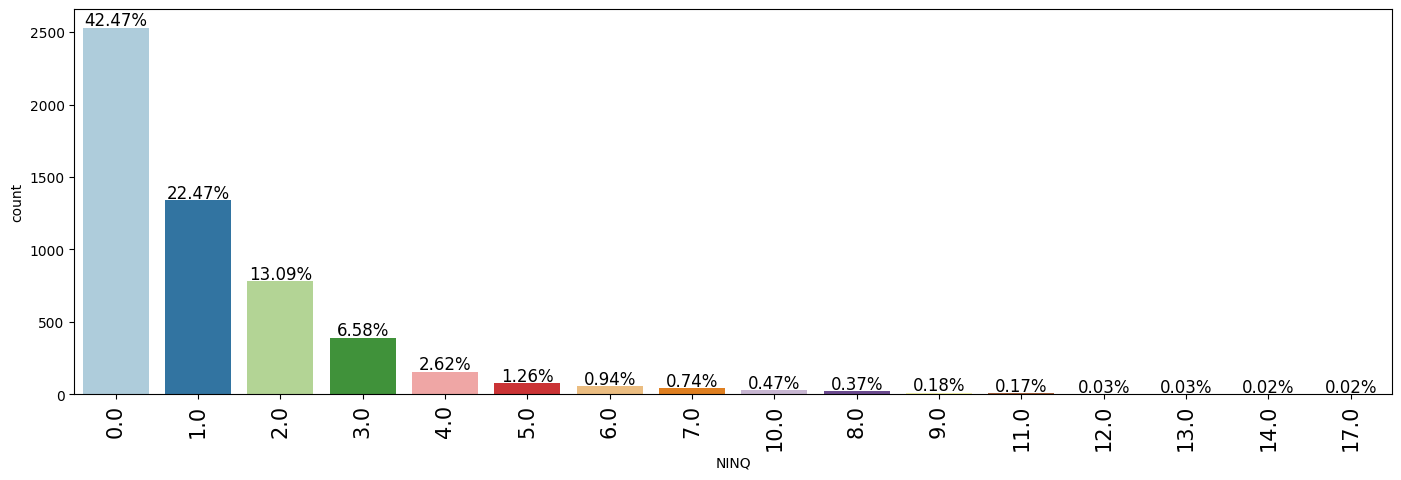

The number of missing values in NINQ is 510


In [ ]:
labeled_barplot(df, 'NINQ',  perc = True)

Counts of Job of the applicant

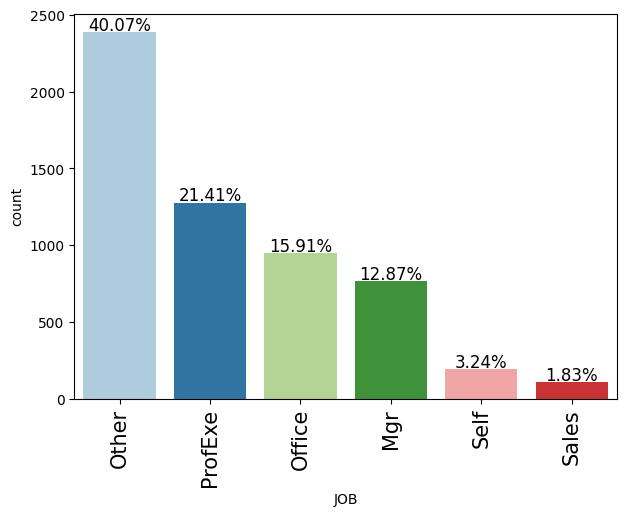

The number of missing values in JOB is 279


In [ ]:
labeled_barplot(df, 'JOB',  perc = True)

Counts of Reason for loan request

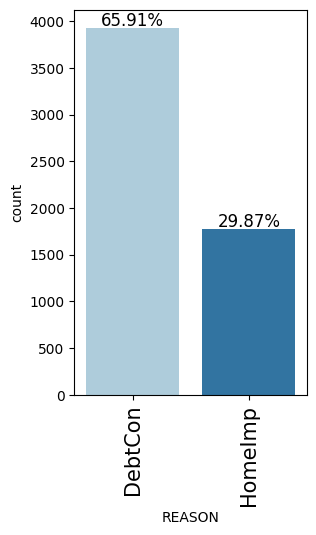

The number of missing values in REASON is 252


In [ ]:
labeled_barplot(df, 'REASON',  perc = True)

## **Bivariate Analysis**

### Numerical VS BAD

In [ ]:
# Function to plot boxplot with annotations without outliers
def boxplot_annot(data, feature, target):

# Creating the boxplot
  sns.boxplot(data=data, x=target, y=feature, showfliers=True, palette=['mediumorchid', 'royalblue']).set_title(f"{feature} vs {target}")

# Calculate stats: mean, median, Q1 and Q3.
  means = data.groupby(target)[feature].mean()
  medians = data.groupby(target)[feature].median()
  q1s = data.groupby(target)[feature].quantile(0.25)
  q3s = data.groupby(target)[feature].quantile(0.75)

# Add annotations for mean
  for i, mean in means.items():
    #plt.text(i, mean, f'Mean: {mean:.2f}', ha='center', va='bottom', fontsize=9, color='black')
    print(f'Mean of {feature}, for {target} {i} is {mean}')

# Add annotations for median
  for i, median in medians.items():
    plt.text(i, median, f'Median: {median:.2f}', ha='center', va='top', fontsize=9, color='black')
    print(f'Median of {feature}, for {target} {i} is {median}')

# Add annotations for q1
  for i, q1 in q1s.items():
    plt.text(i, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', fontsize=9, color='black')
    print(f'Q1 of {feature}, for {target} {i} is {q1}')

# Add annotations for q3
  for i, q3 in q3s.items():
    plt.text(i, q3, f'Q3: {q3:.2f}', ha='center', va='top', fontsize=9, color='black')
    print(f'Q3 of {feature}, for {target} {i} is {q3}')

# Show plot
  plt.xlabel(target)
  plt.ylabel(feature)
  plt.grid(True)
  plt.show()

In [ ]:
# Function to plot to histogram of features around the target variable
def hist_target(data, feature, target, bins):
  fig, axs = plt.subplots(2, 1, figsize=(8,8)) #defining axis and fig size
  targets = data[target].unique() #target_y[0]=1, target_y[1]=0 o alreves.

#First histogram
  axs[0].set_title(f'{feature} corresponding to {target}={targets[0]}')
  sns.histplot(
         data=data[data[target]==targets[0]], x=feature, kde=True, bins=bins, ax=axs[0], color='gold'
      ) if bins else sns.histplot(
         data=data[data[target]==targets[0]], x=feature, kde=True, ax=axs[0], color='gold'
      )

#Second histogram
  axs[1].set_title(f'{feature} corresponding to {target}={targets[1]}')
  sns.histplot(
         data=data[data[target]==targets[1]], x=feature,  kde=True, bins=bins, ax=axs[1], color='mediumpurple'
      )if bins else sns.histplot(
         data=data[data[target]==targets[1]], x=feature,  kde=True, ax=axs[1], color='mediumpurple'
      )

In [ ]:
#calculate missing values of bad grouped with loan
null_loanbad = df.groupby("BAD")["LOAN"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    0
1    0
Name: LOAN, dtype: int64


Mean of LOAN, for BAD 0 is 19028.107315028297
Mean of LOAN, for BAD 1 is 16922.11942809083
Median of LOAN, for BAD 0 is 16900.0
Median of LOAN, for BAD 1 is 14900.0
Q1 of LOAN, for BAD 0 is 11700.0
Q1 of LOAN, for BAD 1 is 9200.0
Q3 of LOAN, for BAD 0 is 23500.0
Q3 of LOAN, for BAD 1 is 21700.0


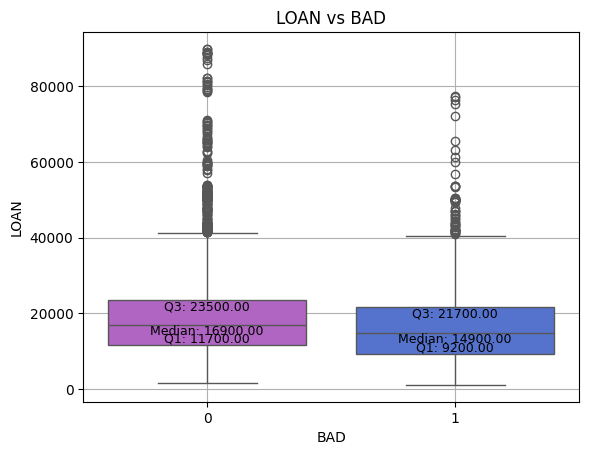

In [ ]:
boxplot_annot(df, 'LOAN', 'BAD')#use function of box plot with annotations

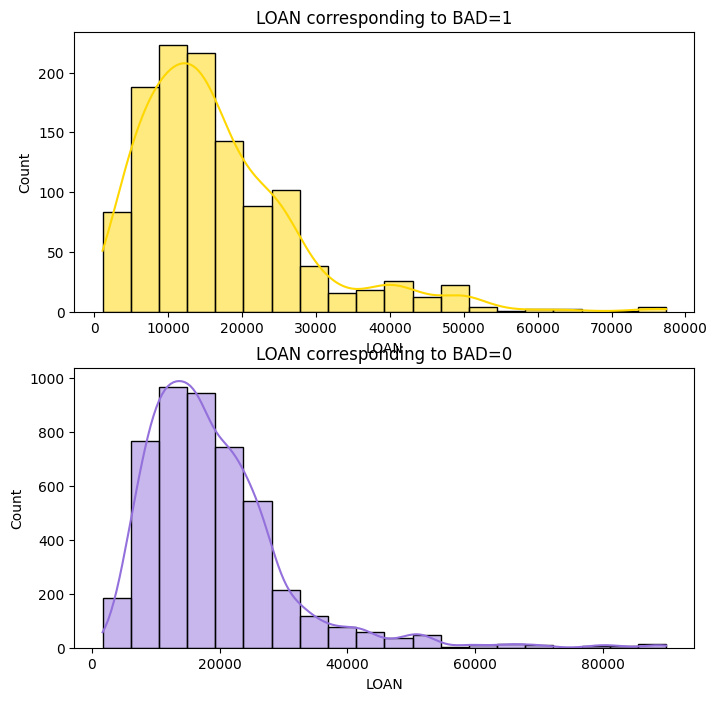

In [ ]:
hist_target(df, 'LOAN', 'BAD', 20)# use function of histogram based on target=BAD

In [ ]:
#calculate missing values of bad grouped with Value
df.groupby("BAD")["VALUE"].max()

BAD
0    471827.0
1    855909.0
Name: VALUE, dtype: float64

In [ ]:
#calculate missing values of bad grouped with Value
df.groupby("BAD")["VALUE"].min()

BAD
0    8000.0
1    8800.0
Name: VALUE, dtype: float64

In [ ]:
#calculate missing values of bad grouped with Value
null_loanbad = df.groupby("BAD")["VALUE"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0      7
1    105
Name: VALUE, dtype: int64


only 7 clients who repaid their loan "forgot" or did not input any VALUE of property. Meanwhile, 105 clients who defaulted on a loan did not input any VALUE of property.

Mean of VALUE, for BAD 0 is 102595.92101805206
Mean of VALUE, for BAD 1 is 98172.84622693727
Median of VALUE, for BAD 0 is 90659.0
Median of VALUE, for BAD 1 is 82000.0
Q1 of VALUE, for BAD 0 is 67297.75
Q1 of VALUE, for BAD 1 is 59368.25
Q3 of VALUE, for BAD 0 is 120615.5
Q3 of VALUE, for BAD 1 is 116000.0


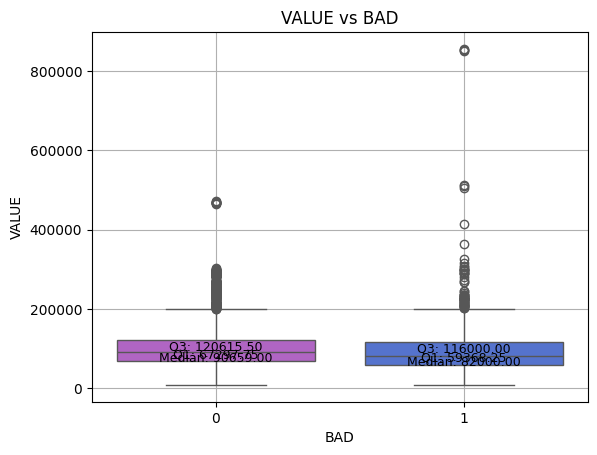

In [ ]:
boxplot_annot(df, 'VALUE', 'BAD')#use function of box plot with annotations

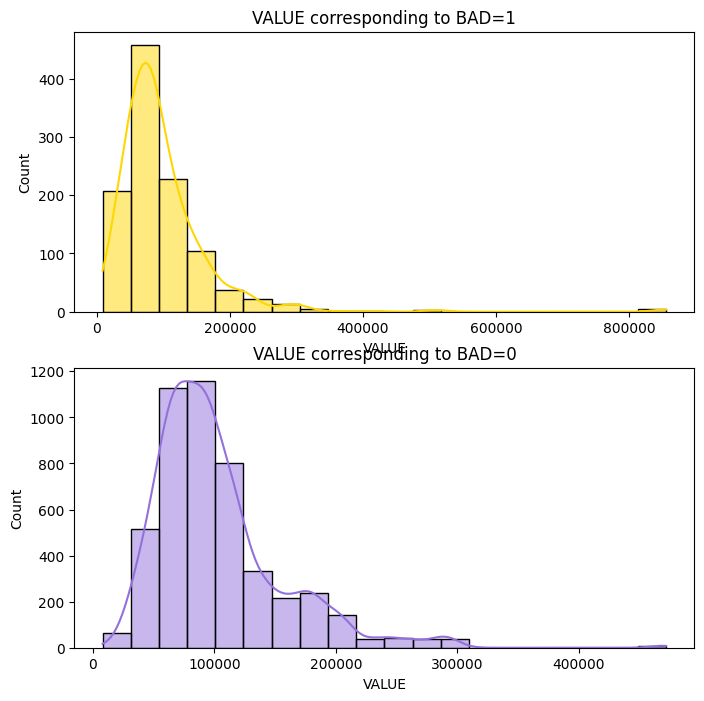

In [ ]:
hist_target(df, 'VALUE', 'BAD', 20)# use function of histogram based on target=BAD

Do applicants who default have a significantly different **mortgage** amount compared to those who **repay** their loan? ok

In [ ]:
#calculate missing values of bad grouped with Mortdue
null_loanbad = df.groupby("BAD")["MORTDUE"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    412
1    106
Name: MORTDUE, dtype: int64


412 clients who repaid their loan did not input any MORTDUE for their property. Meanwhile, 106 clients who defaulted on a loan did not input any MORTDUE for their property. There is a similitude in missing value for defaulted clients on VALUE and MORTDUE, this could be because if you dont own any property, you should not have an MORTDUE.

Mean of MORTDUE, for BAD 0 is 74829.2490548291
Mean of MORTDUE, for BAD 1 is 69460.45297322252
Median of MORTDUE, for BAD 0 is 66839.0
Median of MORTDUE, for BAD 1 is 60279.0
Q1 of MORTDUE, for BAD 0 is 47484.0
Q1 of MORTDUE, for BAD 1 is 39946.5
Q3 of MORTDUE, for BAD 0 is 93068.0
Q3 of MORTDUE, for BAD 1 is 85864.5


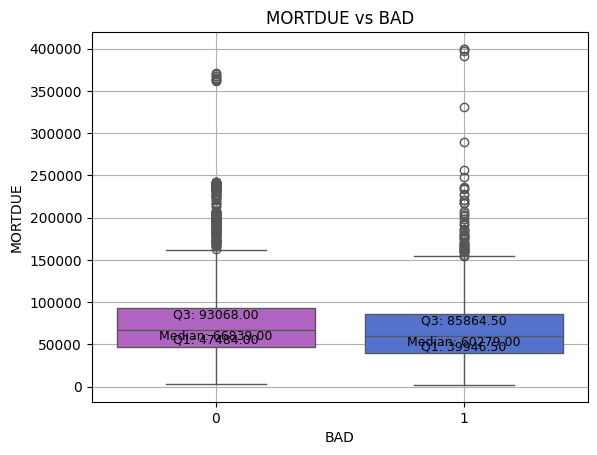

In [ ]:
boxplot_annot(df, 'MORTDUE', 'BAD')#use function of box plot with annotations

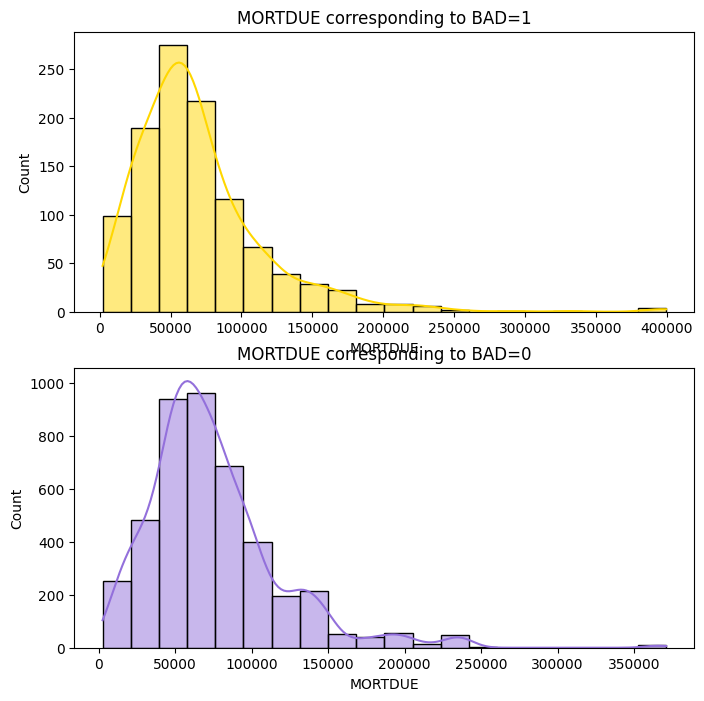

In [ ]:
hist_target(df, 'MORTDUE', 'BAD', 20)# use function of histogram based on target=BAD

In [ ]:
#calculate missing values of bad grouped with Yoj
null_loanbad = df.groupby("BAD")["YOJ"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    450
1     65
Name: YOJ, dtype: int64


450 clients who repaid their loan did not input any YOJ, years in a job. Meanwhile, 65 clients who defaulted on a loan did not input any YOJ.

Mean of YOJ, for BAD 0 is 9.154940985882897
Mean of YOJ, for BAD 1 is 8.027802491103202
Median of YOJ, for BAD 0 is 7.0
Median of YOJ, for BAD 1 is 6.0
Q1 of YOJ, for BAD 0 is 3.0
Q1 of YOJ, for BAD 1 is 2.0
Q3 of YOJ, for BAD 0 is 13.0
Q3 of YOJ, for BAD 1 is 12.0


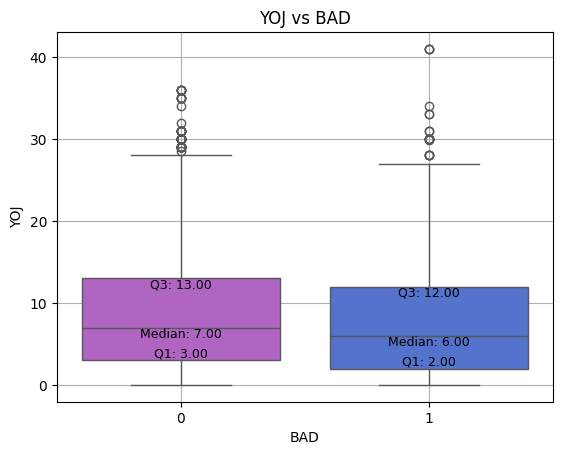

In [ ]:
boxplot_annot(df, 'YOJ', 'BAD')#use function of box plot with annotations

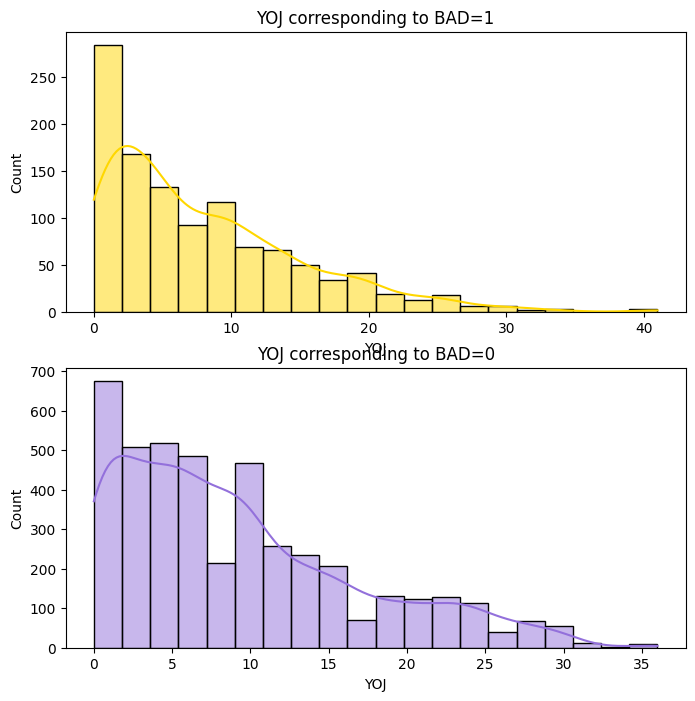

In [ ]:
hist_target(df, 'YOJ', 'BAD', 20)# use function of histogram based on target=BAD

In [ ]:
#calculate missing values of bad grouped with Delinq
null_loanbad = df.groupby("BAD")["DELINQ"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    508
1     72
Name: DELINQ, dtype: int64


508 clients who repaid their loan did not input any DELINQ credit lines. Meanwhile, 72 clients who defaulted on a loan did not input any DELINQ credit lines.

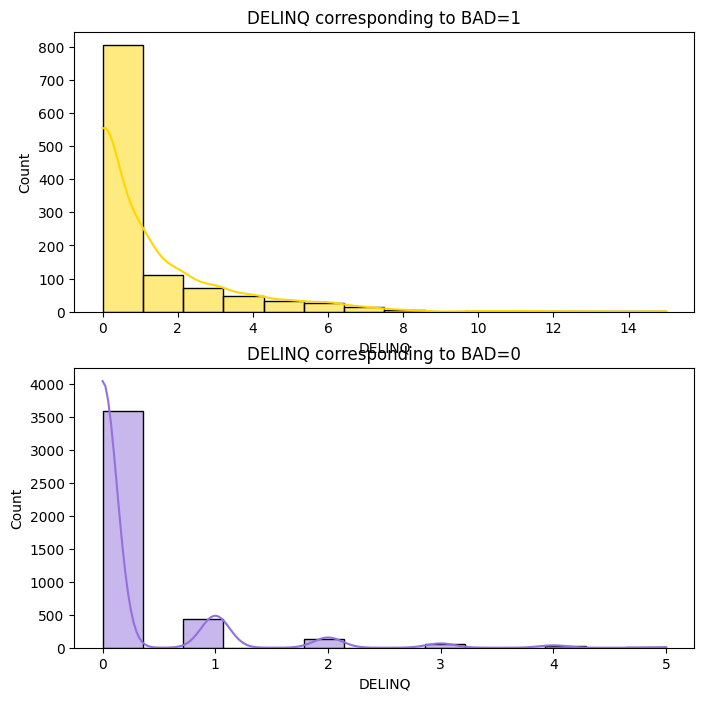

In [ ]:
hist_target(df, 'DELINQ', 'BAD', 14)# use function of histogram based on target=BAD

In [ ]:
#calculate missing values of bad grouped with Derog
null_loanbad = df.groupby("BAD")["DEROG"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    621
1     87
Name: DEROG, dtype: int64


621 clients who repaid their loan did not input any DEROG cases, related to any delinquency or late payment. Meanwhile, 87 clients who defaulted on a loan did not input any DEROG cases.

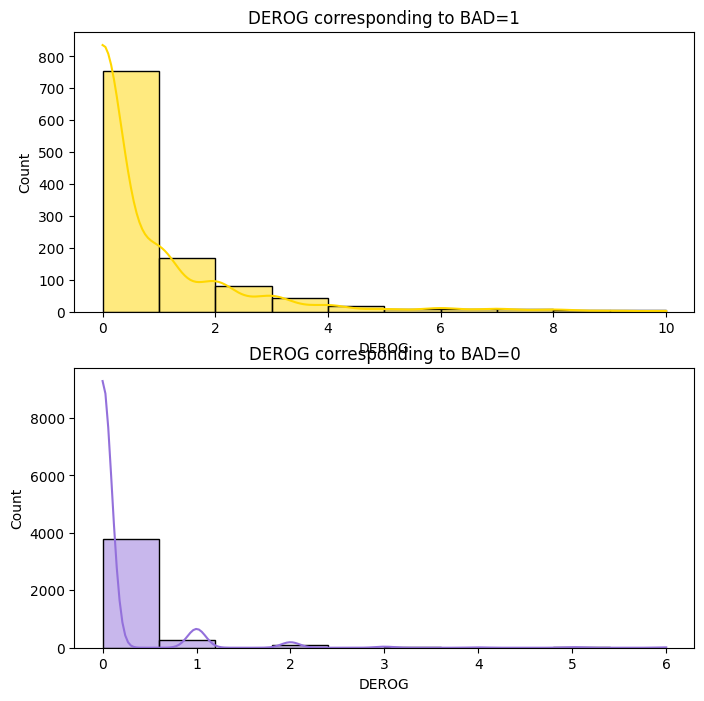

In [ ]:
hist_target(df, 'DEROG', 'BAD', 10)# use function of histogram based on target=BAD

In [ ]:
#calculate missing values of bad grouped with Clage
null_loanbad = df.groupby("BAD")["CLAGE"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    230
1     78
Name: CLAGE, dtype: int64


230 clients who repaid their loan did not input any CLAGE, oldest creditline in months. Meanwhile, 78 clients who defaulted on a loan did not input any CALGE.

Mean of CLAGE, for BAD 0 is 187.00235489716812
Mean of CLAGE, for BAD 1 is 150.19018340812843
Median of CLAGE, for BAD 0 is 180.41578673
Median of CLAGE, for BAD 1 is 132.86666667
Q1 of CLAGE, for BAD 0 is 120.2198845
Q1 of CLAGE, for BAD 1 is 96.033333333
Q3 of CLAGE, for BAD 0 is 240.15780198
Q3 of CLAGE, for BAD 1 is 193.283333335


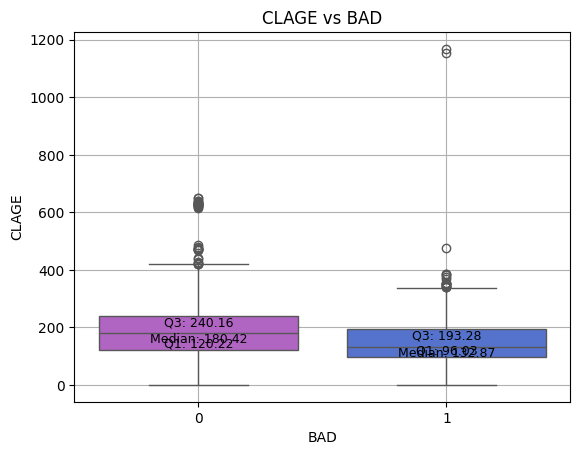

In [ ]:
boxplot_annot(df, 'CLAGE', 'BAD')#use function of box plot with annotations

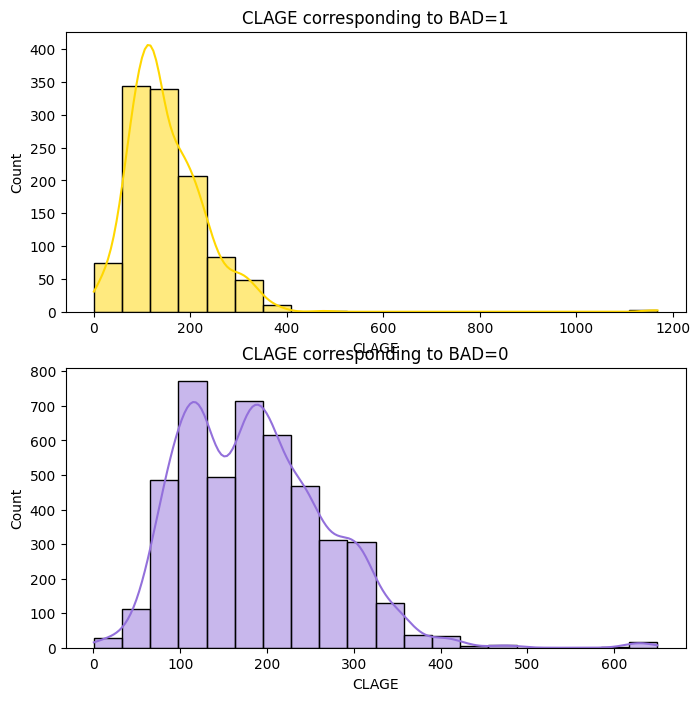

In [ ]:
hist_target(df, 'CLAGE', 'BAD', 20)# use function of histogram based on target=BAD

In [ ]:
#calculate missing values of bad grouped with Ninq
null_loanbad = df.groupby("BAD")["NINQ"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    435
1     75
Name: NINQ, dtype: int64


435 clients who repaid their loan did not input any NINQ: Number of recent credit inquiries. Meanwhile, 75 clients who defaulted on a loan did not input any NINQ.

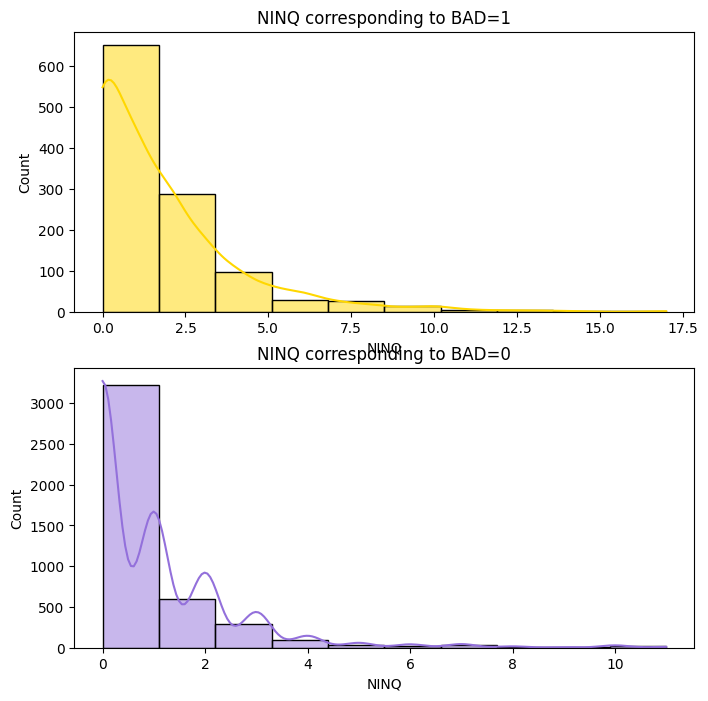

In [ ]:
hist_target(df, 'NINQ', 'BAD', 10)# use function of histogram based on target=BAD

In [ ]:
#calculate missing values of bad grouped with Clno
null_loanbad = df.groupby("BAD")["CLNO"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    169
1     53
Name: CLNO, dtype: int64


169 clients who repaid their loan did not input any CLNO: Number of recent credit inquiries. Meanwhile, 53 clients who defaulted on a loan did not input any CLNO.

Mean of CLNO, for BAD 0 is 21.31703607127336
Mean of CLNO, for BAD 1 is 21.211267605633804
Median of CLNO, for BAD 0 is 20.0
Median of CLNO, for BAD 1 is 20.0
Q1 of CLNO, for BAD 0 is 15.0
Q1 of CLNO, for BAD 1 is 13.0
Q3 of CLNO, for BAD 0 is 26.0
Q3 of CLNO, for BAD 1 is 28.0


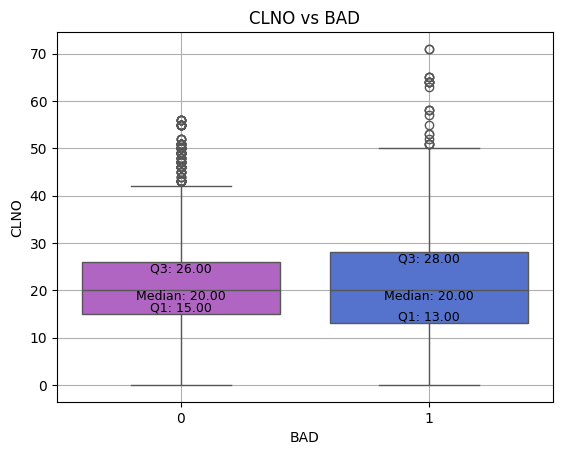

In [ ]:
boxplot_annot(df, 'CLNO', 'BAD')#use function of box plot with annotations

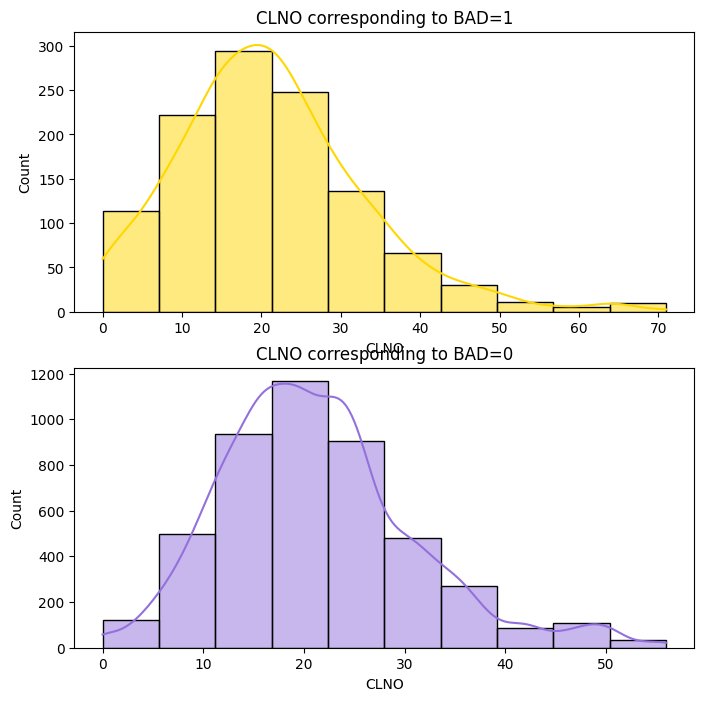

In [ ]:
hist_target(df, 'CLNO', 'BAD', 10)# use function of histogram based on target=BAD

In [ ]:
#calculate missing values of bad grouped with Debtinc
null_loanbad = df.groupby("BAD")["DEBTINC"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    481
1    786
Name: DEBTINC, dtype: int64


481 clients who repaid their loan did not input any DEBTINC: Debt-to-income ratio. Meanwhile, 786 clients who defaulted on a loan did not input any DEBTINC.

In [ ]:
df["DEBTINC"].min()

0.5244992154

Mean of DEBTINC, for BAD 0 is 33.253128634022126
Mean of DEBTINC, for BAD 1 is 39.38764489229107
Median of DEBTINC, for BAD 0 is 34.54167138
Median of DEBTINC, for BAD 1 is 38.079761822
Q1 of DEBTINC, for BAD 0 is 28.905127466
Q1 of DEBTINC, for BAD 1 is 32.383045588
Q3 of DEBTINC, for BAD 0 is 38.7390765835
Q3 of DEBTINC, for BAD 1 is 43.285989603000004


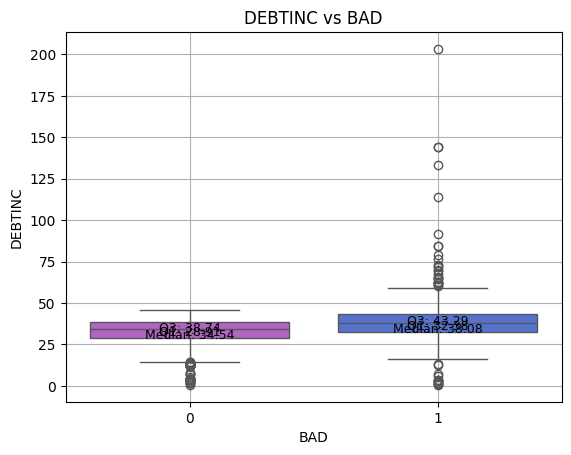

In [ ]:
boxplot_annot(df, 'DEBTINC', 'BAD')#use function of box plot with annotations

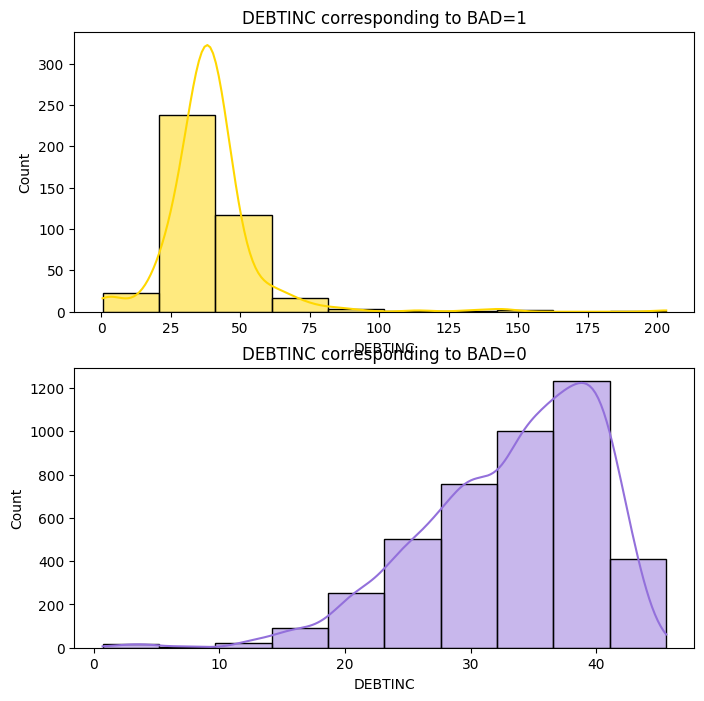

In [ ]:
hist_target(df, 'DEBTINC', 'BAD', 10)# use function of histogram based on target=BAD

### Categorical vs BAD

In [ ]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 4))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

BAD        0     1   All
DELINQ                  
All     4263  1117  5380
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
------------------------------------------------------------------------------------------------------------------------


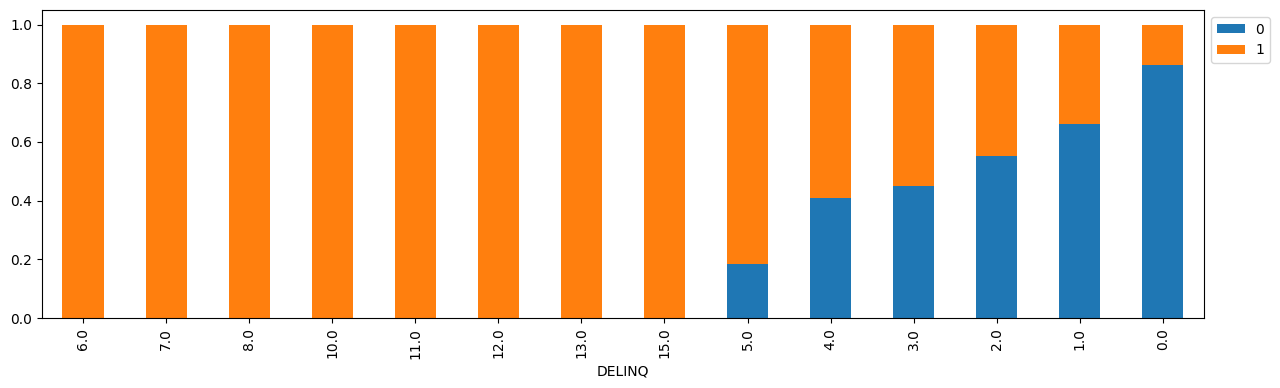

In [ ]:
#use of stacked barplots to visualize counts based on target=BAD
stacked_barplot(df, 'DELINQ', 'BAD')

Those who repaid their loan, have a range of 0-5 DELINQ. And those who defaulted on a loan, from 0-15.

In [ ]:
#calculate missing values of bad grouped with Delinq
null_loanbad = df.groupby("BAD")["DELINQ"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    508
1     72
Name: DELINQ, dtype: int64


BAD       0     1   All
DEROG                  
All    4150  1102  5252
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
6.0       5    10    15
7.0       0     8     8
5.0       8     7    15
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
------------------------------------------------------------------------------------------------------------------------


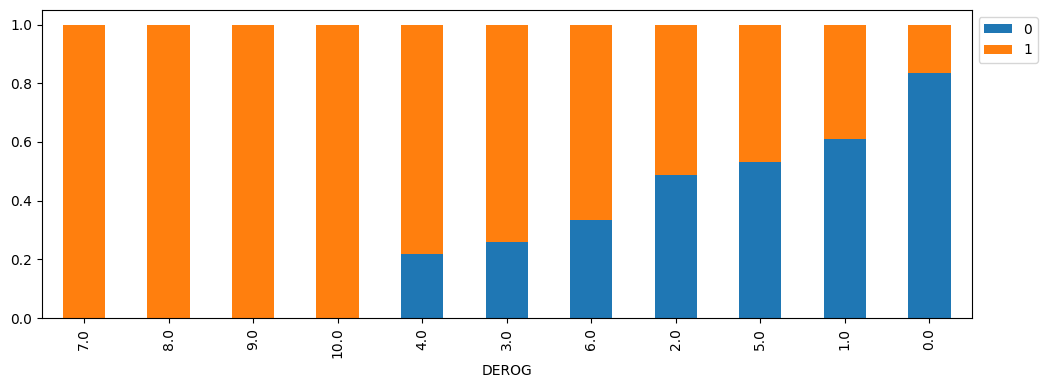

In [ ]:
#use of stacked barplots to visualize counts based on target=BAD
stacked_barplot(df, 'DEROG', 'BAD')

The range of DEROG for those who defaulted on a loan is 0-10. And for those who repaid their loan, 0-6.

In [ ]:
#calculate missing values of bad grouped with Derog
null_loanbad = df.groupby("BAD")["DEROG"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    621
1     87
Name: DEROG, dtype: int64


BAD      0     1   All
NINQ                  
All   4336  1114  5450
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
10.0    19     9    28
9.0      5     6    11
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
------------------------------------------------------------------------------------------------------------------------


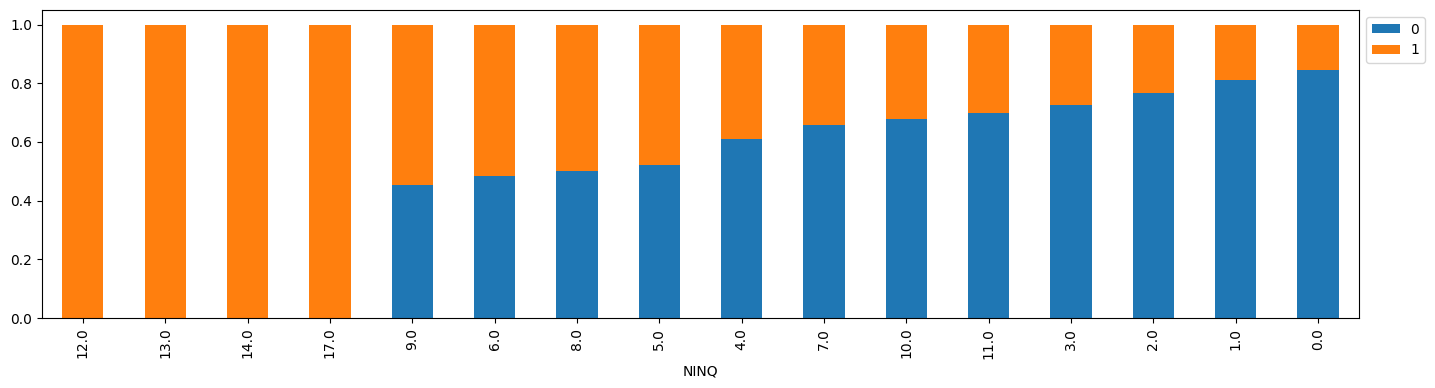

In [ ]:
#use of stacked barplots to visualize counts based on target=BAD
stacked_barplot(df, 'NINQ', 'BAD')

In [ ]:
#calculate missing values of bad grouped with Ninq
null_loanbad = df.groupby("BAD")["NINQ"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    435
1     75
Name: NINQ, dtype: int64


BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


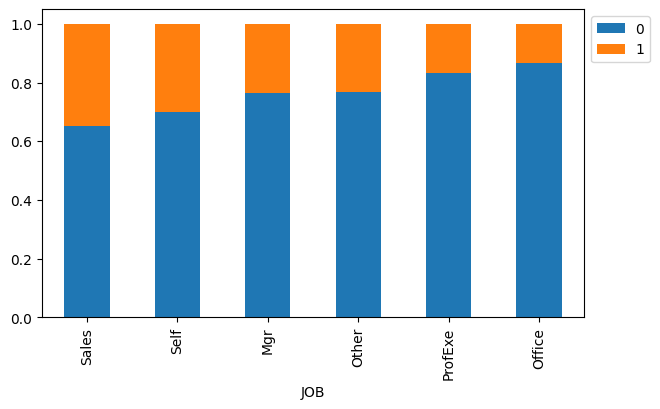

In [ ]:
#use of stacked barplots to visualize counts based on target=BAD
stacked_barplot(df, 'JOB', 'BAD')

In [ ]:
#calculate missing values of bad grouped with job
null_loanbad = df.groupby("BAD")["JOB"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    256
1     23
Name: JOB, dtype: int64


In [ ]:
df.groupby("BAD")["JOB"].value_counts()

BAD  JOB    
0    Other      1834
     ProfExe    1064
     Office      823
     Mgr         588
     Self        135
     Sales        71
1    Other       554
     ProfExe     212
     Mgr         179
     Office      125
     Self         58
     Sales        38
Name: count, dtype: int64

The reason for loan default, DebtCon or HomeImp is very fairly distributed.

BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780
------------------------------------------------------------------------------------------------------------------------


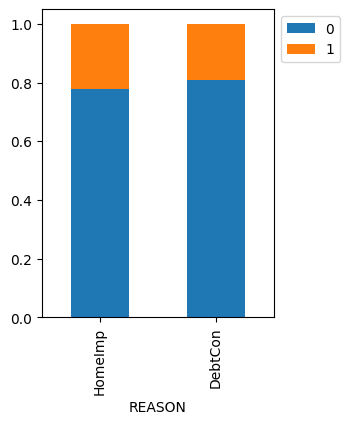

In [ ]:
#use of stacked barplots to visualize counts based on target=BAD
stacked_barplot(df, 'REASON', 'BAD')

In [ ]:
#calculate missing values of bad grouped with Reason
null_loanbad = df.groupby("BAD")["REASON"].apply(lambda x: x.isnull().sum())
print(null_loanbad)

BAD
0    204
1     48
Name: REASON, dtype: int64


## **Multivariate Analysis**

In [ ]:
df_copy=df.copy()#create a copy of the dataframe

<Axes: >

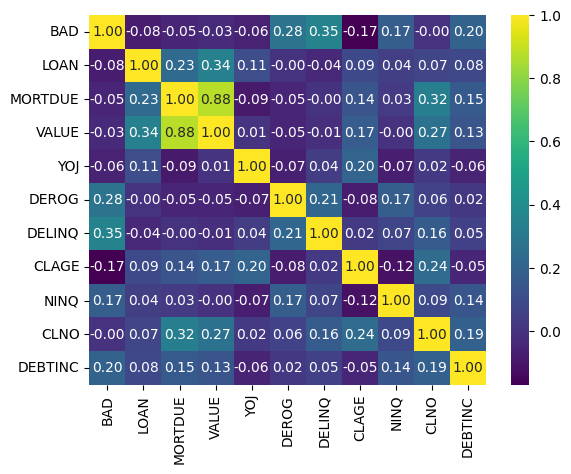

In [ ]:
#Heat map of the Correlation of numerical data
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, fmt=".2f",cmap="viridis")

# Treating Outliers

In [ ]:
def treat_outliers_iqr(df, col_list, QT, QB):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    QT: top quantile
    QB: Bottom quantile
    '''
    for c in col_list:
        Qb=df[c].quantile(QB) # Botton quantile
        Qt=df[c].quantile(QT) # Top quantile
        IQR=Qt-Qb  # IQR Range
        Lower_Whisker = Qb-1.5*IQR #define lower whisker
        Upper_Whisker = Qt+1.5*IQR  # define upper Whisker
        df[c] = np.clip(df[c], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df


91150.0
352650.27499999997
450716.95
700.7143524773251
89.5
76.1518027536
60.0


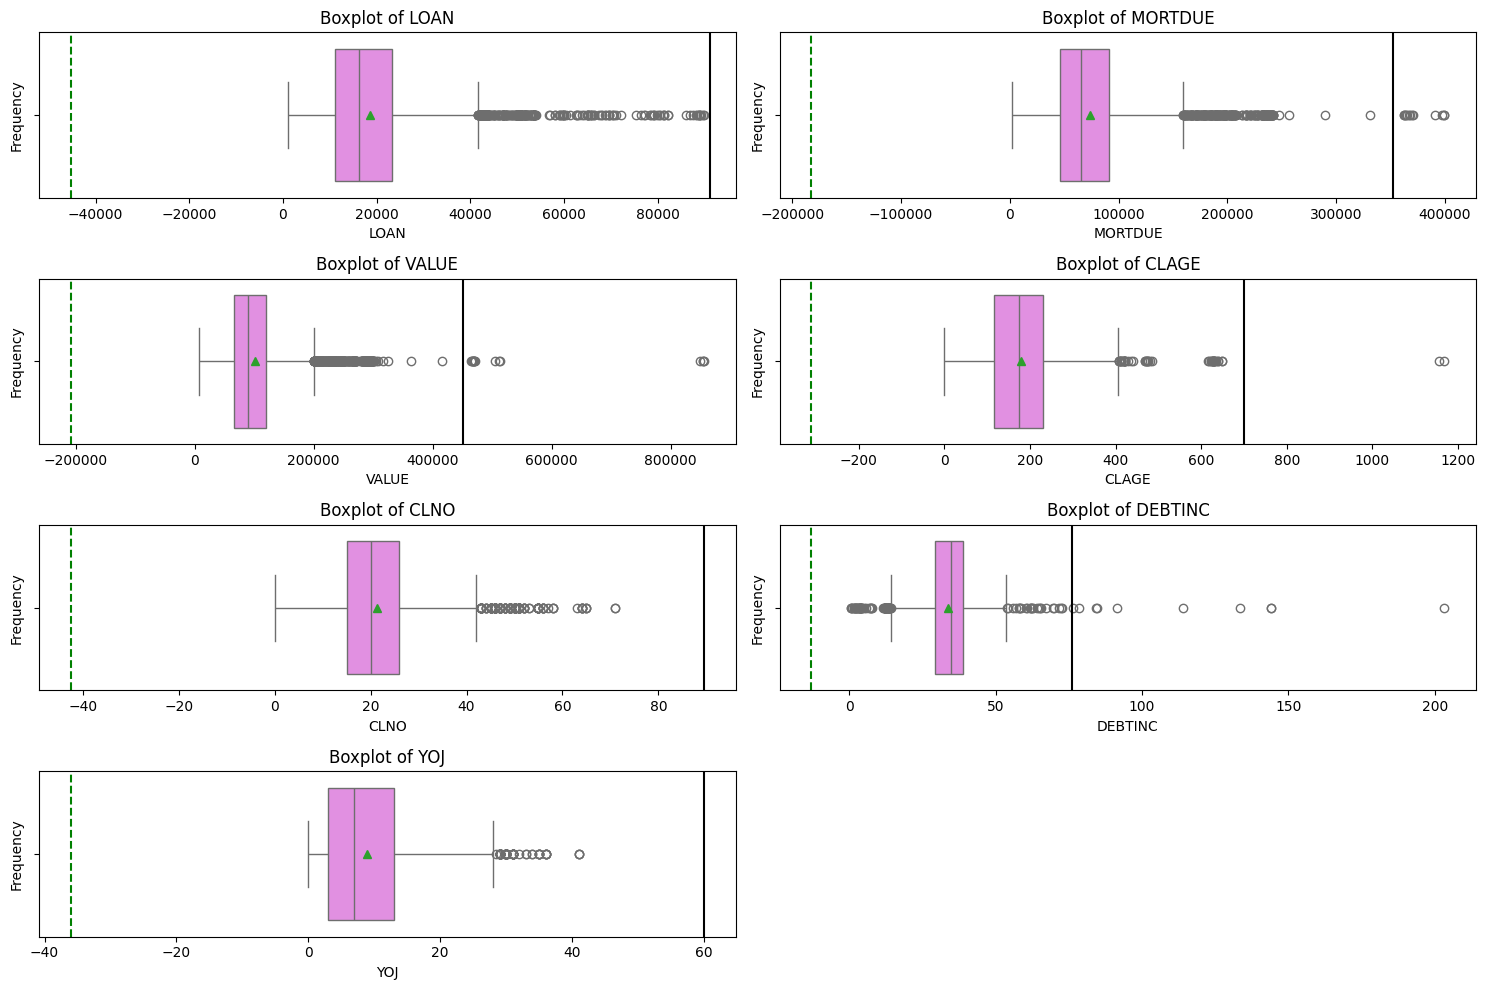

In [ ]:
#FIGURE FOR outlier check
# List of column names for outliers treatment
num_cols_outliers=['LOAN','MORTDUE','VALUE','CLAGE', 'CLNO','DEBTINC', 'YOJ']

num_plots = len(num_cols_outliers) #number of rows and columns for subplot layout
num_cols = 2  # Number of columns for the subplot grid
num_rows = math.ceil(num_plots / num_cols)  # Round up to ensure enough rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array if necessary
if num_plots == 1:
    axes = [axes]

# Iterate over column names and plot
for i, col in enumerate(num_cols_outliers):
    row_index = i // num_cols  # Calculate row index
    col_index = i % num_cols   # Calculate column index
    sns.boxplot(data=df_copy, x=col, ax=axes[row_index][col_index], showmeans = True, color = "violet")
    axes[row_index][col_index].set_title(f'Boxplot of {col}')
    axes[row_index][col_index].set_xlabel(col)
    axes[row_index][col_index].set_ylabel('Frequency')
    Q1=df_copy[col].quantile(0.05) # 05th quantile
    Q3=df_copy[col].quantile(0.95) # 95th quantile
    IQR=Q3-Q1  # IQR Range
    Lower_Whisker = Q1-1.5*IQR #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    print(Upper_Whisker)
    axes[row_index][col_index].axvline(
        Lower_Whisker, color = "green", linestyle = "--"
    )
    axes[row_index][col_index].axvline(
        Upper_Whisker, color = "black", linestyle = "-"
    )
    # Remove empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Clage and Debtinc have outlier worth treating. Value has outliers but those are real values so they will not be treated. Mortdue has outliers but they are also real values so they wont be treated either.

* **CLAGE:** Age of the oldest credit line in months.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

* **NINQ:** Number of recent credit inquiries.

#### Outlier capping

Since clage is the oldest credit line in months, we can see which ones just donsn't make any sense. For example, those line with age older than 90 years, or 90*12=1080 months does not make any sense. We will cap it at that 700/12=58years.

In [ ]:
outliers0=df_copy[df_copy['CLAGE']>45*12]#returns rows in the dataframe where CLAGE>540
print(outliers0)

      BAD   LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
3097    1  16800  87300.0  155500.0  DebtCon    Other   3.0    0.0     0.0   
3679    1  19300  96454.0  157809.0  DebtCon    Other   3.0    0.0     0.0   
3787    0  20000  56135.0   93234.0  HomeImp  ProfExe  18.0    0.0     0.0   
3856    0  20200  61303.0   97780.0  HomeImp  ProfExe  17.0    0.0     1.0   
3868    0  20200  59347.0   97816.0  HomeImp  ProfExe  18.0    0.0     0.0   
3928    0  20500  64113.0   98322.0  HomeImp  ProfExe  16.0    0.0     0.0   
4040    0  21100  63955.0   95621.0  HomeImp  ProfExe  19.0    0.0     0.0   
4059    0  21200  63093.0  101789.0  HomeImp  ProfExe  18.0    0.0     0.0   
4098    0  21400  64378.0   99343.0  HomeImp  ProfExe  18.0    0.0     0.0   
4143    0  21600  59219.0   98111.0  HomeImp  ProfExe  18.0    0.0     0.0   
4153    0  21700  62506.0   96588.0  HomeImp  ProfExe  18.0    0.0     1.0   
4238    0  22000  61042.0   96622.0  HomeImp  ProfExe  17.0    0

As it can be seen, the CLAGE outliers above 540 months, or 45 years, share similarities in almost every column, REASON, JOB, NINQ, CLNO. Loan and Mortdue ratio is very similar. The only exception are those values with CLAGE>700 and YOJ=3, those two will be treated as outliers.

In [ ]:
#treating outliers
df_outliers_treated=treat_outliers_iqr(df, num_cols_outliers, QT=0.995, QB=0.005)

In [ ]:
df_outliers_treated[df_outliers_treated['CLAGE']>58*12]

BAD   LOAN  MORTDUE     VALUE   REASON    JOB  YOJ  DEROG  DELINQ  \
3097    1  16800  87300.0  155500.0  DebtCon  Other  3.0    0.0     0.0   
3679    1  19300  96454.0  157809.0  DebtCon  Other  3.0    0.0     0.0   

            CLAGE  NINQ  CLNO    DEBTINC  
3097  1132.133593   0.0   0.0        NaN  
3679  1132.133593   0.0   0.0  40.206138

As it can be seen, outliers have been caped

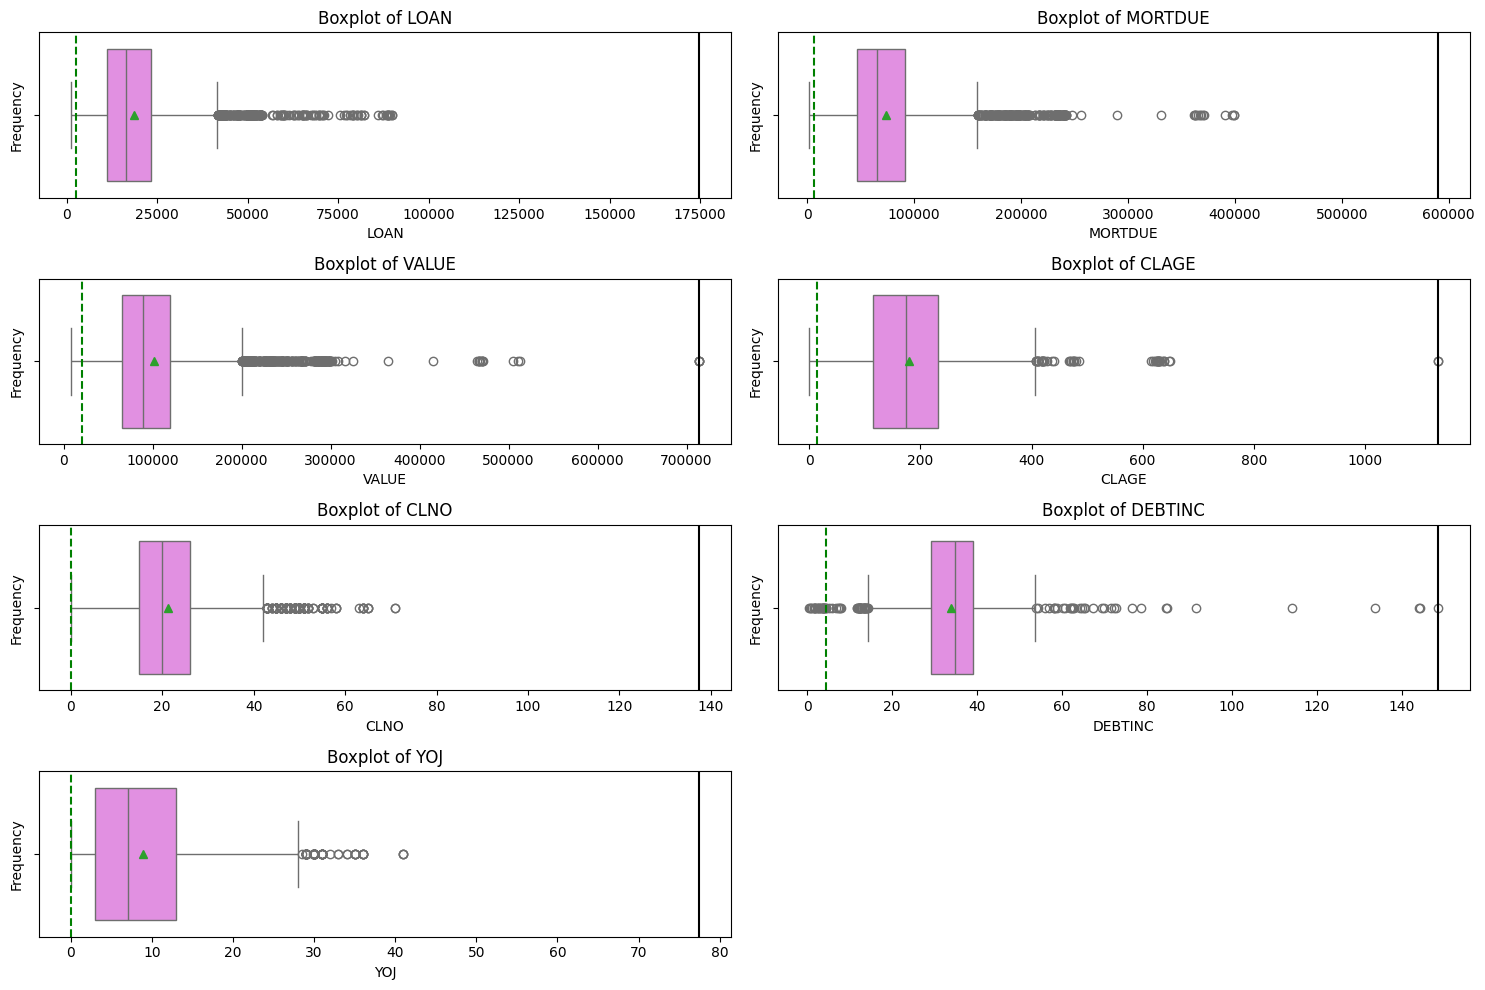

In [ ]:
#Figure to visualize outliers capped

num_plots = len(num_cols_outliers)# number of rows and columns for subplot layout
num_cols = 2  # Number of columns for the subplot grid
num_rows = math.ceil(num_plots / num_cols)  # Round up to ensure enough rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array if necessary
if num_plots == 1:
    axes = [axes]

# Iterate over column names and plot
for i, col in enumerate(num_cols_outliers):
    row_index = i // num_cols  # Calculate row index
    col_index = i % num_cols   # Calculate column index
    sns.boxplot(data=df_outliers_treated, x=col, ax=axes[row_index][col_index], showmeans = True, color = "violet")
    axes[row_index][col_index].set_title(f'Boxplot of {col}')
    axes[row_index][col_index].set_xlabel(col)
    axes[row_index][col_index].set_ylabel('Frequency')
    Q1=df_copy[col].quantile(0.005) # 05th quantile
    Q3=df_copy[col].quantile(0.995) # 95th quantile
    IQR=Q3-Q1  # IQR Range
    Lower_Whisker = Q1-1.5*IQR #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    axes[row_index][col_index].axvline(
        Q1, color = "green", linestyle = "--"
    )
    axes[row_index][col_index].axvline(
        Upper_Whisker, color = "black", linestyle = "-"
    )
    # Remove empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

LOAN
Skew : 2.02


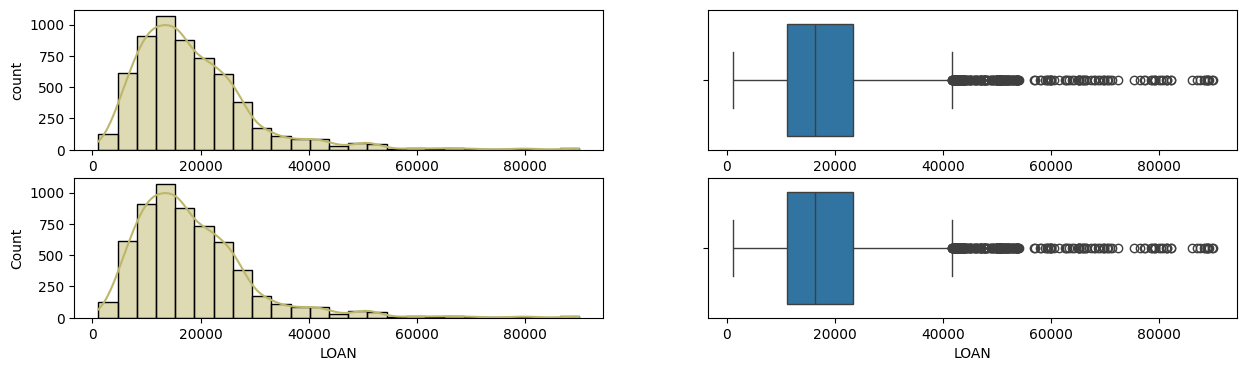

MORTDUE
Skew : 1.81


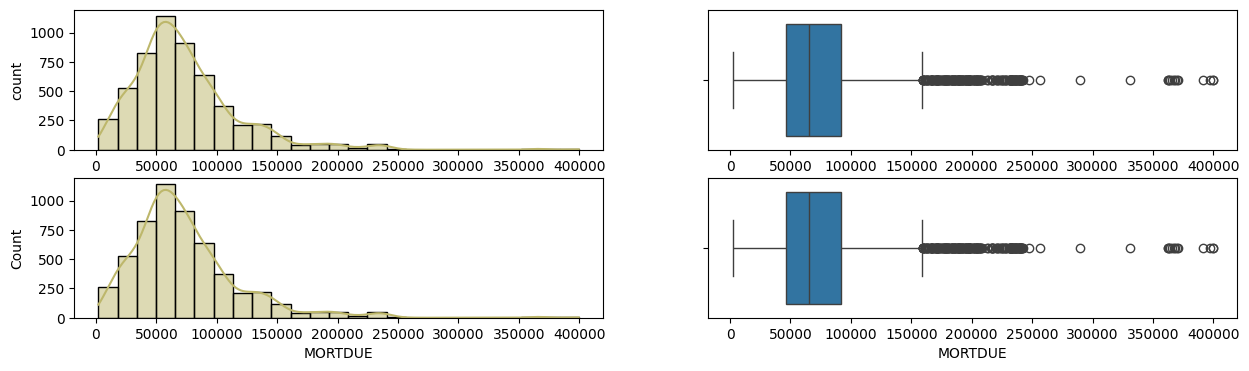

VALUE
Skew : 3.05


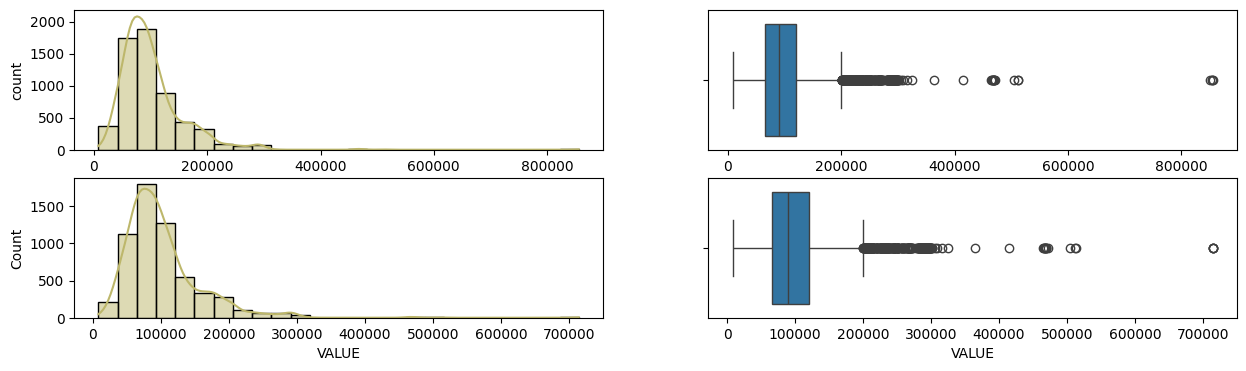

CLAGE
Skew : 1.34


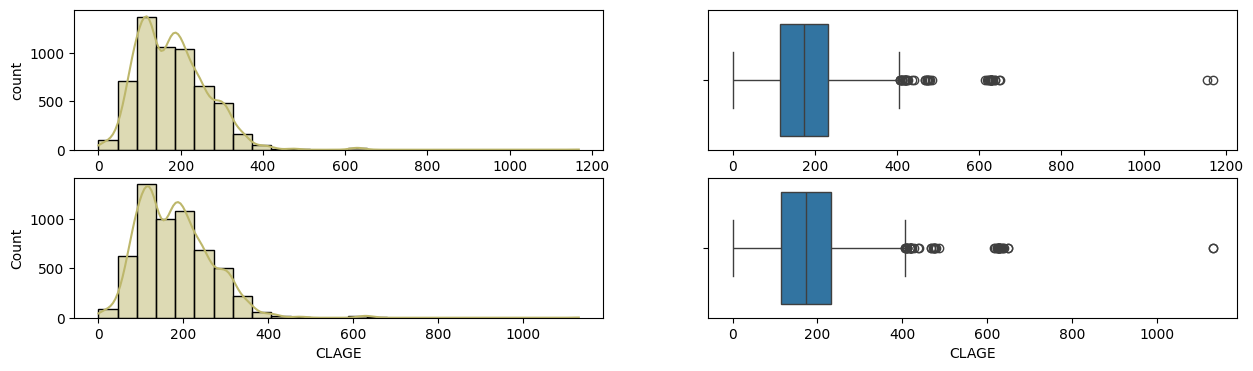

CLNO
Skew : 0.78


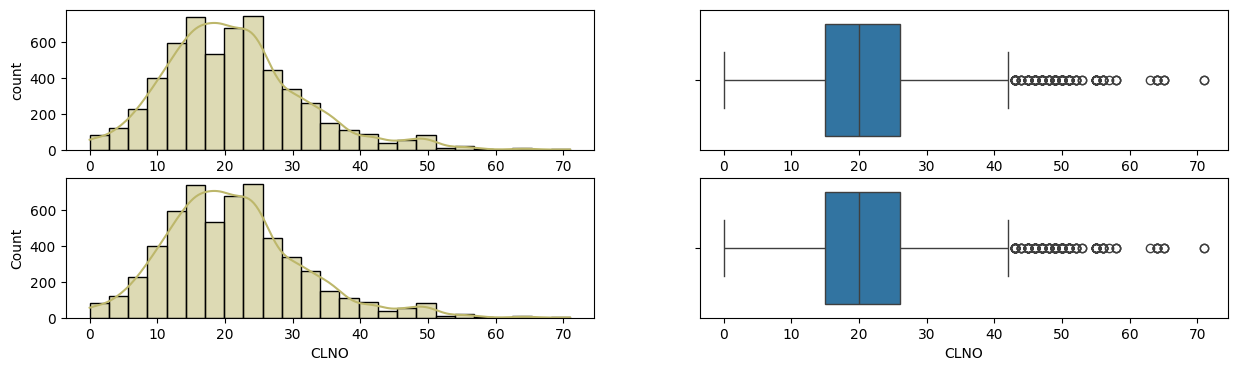

DEBTINC
Skew : 2.85


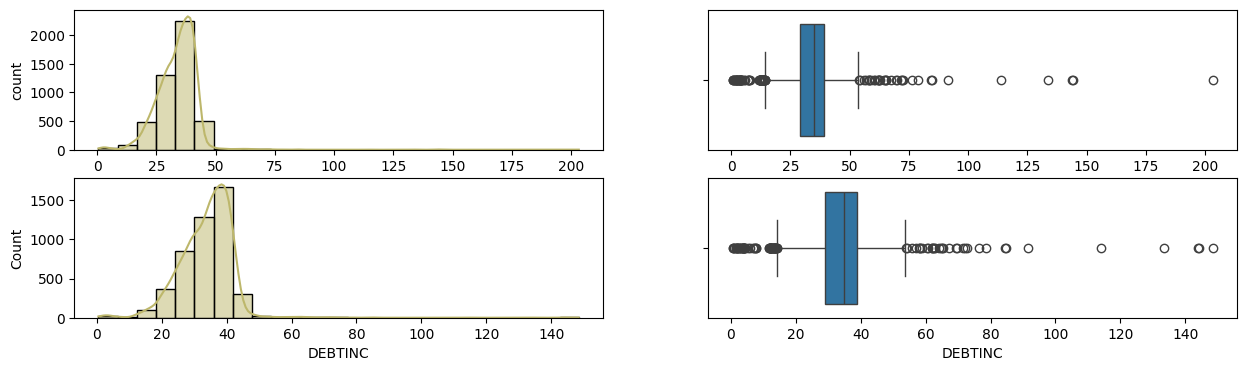

YOJ
Skew : 0.99


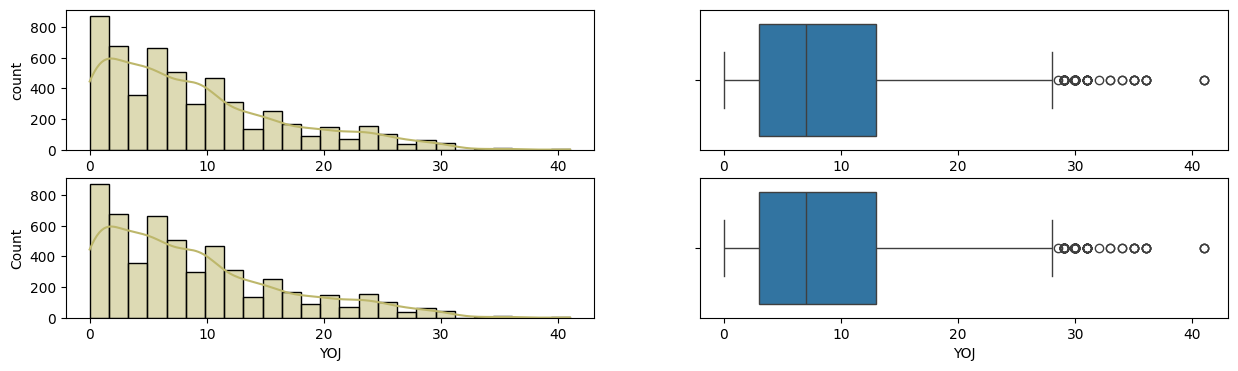

In [ ]:
#Figure to compare outliers capped vs not capped
# with histogram and boxplot

for col in num_cols_outliers:
    print(col)

    print('Skew :', round(df_copy[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(2,2,1)
    sns.histplot(data = df_copy, x = col, kde=True, bins=25, color="darkkhaki");
    plt.ylabel('count')

    plt.subplot(2, 2, 2)
    sns.boxplot(x = df_copy[col])

    plt.subplot(2, 2, 3)
    sns.histplot(data = df_outliers_treated, x = col, kde=True, bins=25, color="darkkhaki");

    plt.subplot(2, 2, 4)
    sns.boxplot(x = df_outliers_treated[col])

    plt.show()

## obs:
Clage and Debtinc have outlier worth treating. Value has outliers but those are real values so they will not be treated. Mortdue has outliers but they are also real values so they wont be treated either.

We treated the outliers with the 5th and 95th percentile on all numerical variables. After further analysis. It is believed that VALUE, MORTDUE, and NINQ could be left untreated because they are real possible values.



# Treating Missing Values

In [ ]:
# df_outliers_treated : dataframe with treated outliers.
# df : original data frame, used to create df_outlier_treated
# df_copy : Copy of the original df, for comparison.

## Mode and Mean Method

In [ ]:
# missing values of the original dataframe
df_nomv_modemedian=df_outliers_treated.copy()
originial_missingvalues=df_nomv_modemedian.isnull().sum()

In [ ]:
# mean and median of the numerical variables.
#¿should i create a new data frame and drop the variables with no missing values?
for column in num_col:
  median=df[column].median()
  mean=df[column].mean()
  #print(f'The median of {column} is {median} \nThe mean of {column} is {mean}')

We have many outliers in our data, for decision trees i dont need to treat them necesarily, but i do need to treat them for logistic regression.  
Since we have many outliers in our data, and the mean is suceptible to outliers, we will use the median and save it in a dataframe.

We will also create a copy of the dataframe where we treat the outliers and use the mean, and see what happens.

In [ ]:
#mode of the categorical variables
for column in cat_col:
  mode=df_nomv_modemedian[column].mode()[0]
  #print(mode)

In [ ]:
df_nomv_modemedian

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0       1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1       1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2       1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3       1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4       0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ...    ...      ...       ...      ...     ...   ...    ...     ...   
5955    0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956    0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957    0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958    0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959    0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0        NaN  
1     121.833333   0.0  14.0        NaN  
2     149.466667   1.0  10.0        NaN  
3            NaN   NaN   NaN        NaN  
4      93.333333   0.0  14.0        NaN  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

In [ ]:
#replace the mode and the median for all the missing value per variable
for column in cols:
  if column in cat_col:
    df_nomv_modemedian[column].fillna(df[column].mode()[0], inplace=True)#mode
  else:
    df_nomv_modemedian[column].fillna(df[column].median(), inplace=True)#median

In [ ]:
df_nomv_modemedian.isnull().sum()#check missing values

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
df_copy.isnull().sum()#check missing values of the original dataframe

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Compareing missing values of VALUE YOJ CLAGE CLNO DEBTINC DEROG DELINQ NINQ.

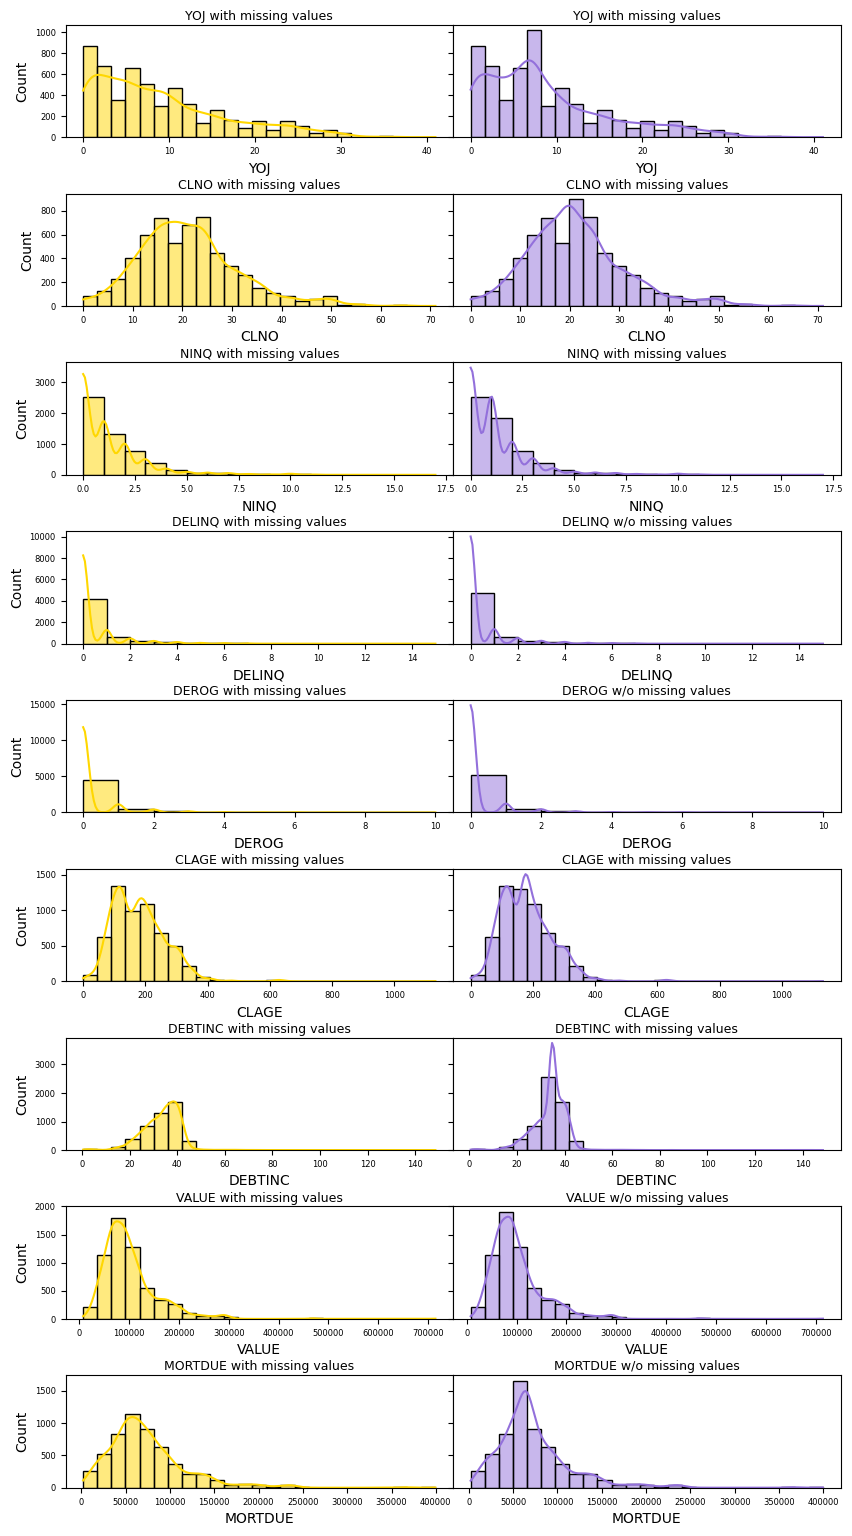

In [ ]:
# Figure to plot compare trends of
# no missing values vs imputed missing values with mode and median

fig = plt.figure(layout='tight', figsize = (10, 19))
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

gs = fig.add_gridspec(9, 2, hspace=0.5, wspace=0)
axs = gs.subplots( sharey='row')
#fig.suptitle('Comparing Missing Values Treated with median')

axs[0,0].set_title('YOJ with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'YOJ', kde=True, ax = axs[0,0], bins=25, color="gold");
axs[0,1].set_title('YOJ with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'YOJ', kde=True, ax = axs[0,1], bins=25, color="mediumpurple");

axs[1,0].set_title('CLNO with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'CLNO', kde=True, ax = axs[1,0], bins=25, color="gold");
axs[1,1].set_title('CLNO with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'CLNO', kde=True, ax = axs[1,1], bins=25, color="mediumpurple");

axs[2,0].set_title('NINQ with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'NINQ', kde=True, ax = axs[2,0], bins=17, color="gold");
axs[2,1].set_title('NINQ with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'NINQ', kde=True, ax = axs[2,1], bins=17, color="mediumpurple");

axs[3,0].set_title('DELINQ with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'DELINQ', kde=True, ax = axs[3,0], bins=15, color="gold");
axs[3,1].set_title('DELINQ w/o missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'DELINQ', kde=True, ax = axs[3,1], bins=15, color="mediumpurple");

axs[4,0].set_title('DEROG with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'DEROG', kde=True, ax = axs[4,0], bins=10, color="gold");
axs[4,1].set_title('DEROG w/o missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'DEROG', kde=True, ax = axs[4,1], bins=10, color="mediumpurple");

axs[5,0].set_title('CLAGE with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'CLAGE', kde=True, ax = axs[5,0], bins=25, color="gold" );
axs[5,1].set_title('CLAGE with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'CLAGE', kde=True, ax = axs[5,1], bins=25, color="mediumpurple");

axs[6,0].set_title('DEBTINC with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'DEBTINC', kde=True, ax = axs[6,0], bins=25, color="gold");
axs[6,1].set_title('DEBTINC with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'DEBTINC', kde=True, ax = axs[6,1], bins=25, color="mediumpurple");

axs[7,0].set_title('VALUE with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'VALUE', kde=True, ax = axs[7,0], bins=25, color="gold");
axs[7,1].set_title('VALUE w/o missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'VALUE', kde=True, ax = axs[7,1], bins=25, color="mediumpurple");

axs[8,0].set_title('MORTDUE with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'MORTDUE', kde=True, ax = axs[8,0], bins=25, color="gold");
axs[8,1].set_title('MORTDUE w/o missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'MORTDUE', kde=True, ax = axs[8,1], bins=25, color="mediumpurple");

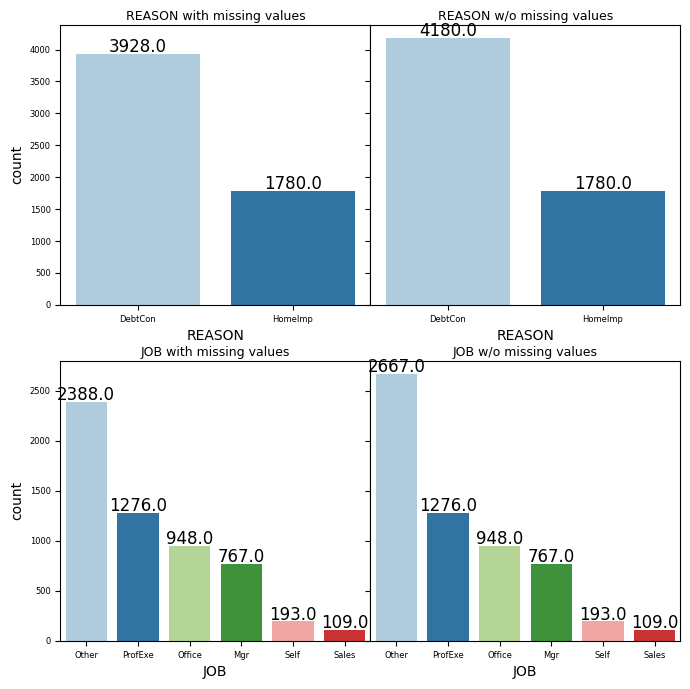

In [ ]:
# Figure to compare value counts before and after missing value imputation
"""
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
"""
fig = plt.figure(layout='tight', figsize = (8, 8))

gs = fig.add_gridspec(2, 2, hspace=0.2, wspace=0)
axs = gs.subplots( sharey='row')


axs[0,0].set_title('REASON with missing values', ha='center', va='center', fontsize=9)
ax= sns.countplot(
        data = df,
        x = 'REASON',
        palette = "Paired",
        order = df['REASON'].value_counts().sort_values(ascending=False).index,
        ax = axs[0,0]
    )

for p in ax.patches:
        label = p.get_height()         # Count of each level of the category
        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

axs[0,1].set_title('REASON w/o missing values', ha='center', va='center', fontsize=9)
ax0= sns.countplot(
        data = df_nomv_modemedian,
        x = 'REASON',
        palette = "Paired",
        order = df_nomv_modemedian['REASON'].value_counts().sort_values(ascending=False).index,
        ax = axs[0,1]
    )

for p in ax0.patches:
        label = p.get_height()         # Count of each level of the category
        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax0.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

axs[1,0].set_title('JOB with missing values', ha='center', va='center', fontsize=9)
ax1= sns.countplot(
        data = df,
        x = 'JOB',
        palette = "Paired",
        order = df['JOB'].value_counts().sort_values(ascending=False).index,
        ax = axs[1,0]
    )

for p in ax1.patches:
        label = p.get_height()         # Count of each level of the category
        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax1.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

axs[1,1].set_title('JOB w/o missing values', ha='center', va='center', fontsize=9)
ax2= sns.countplot(
        data = df_nomv_modemedian,
        x = 'JOB',
        palette = "Paired",
        order = df_nomv_modemedian['JOB'].value_counts().sort_values(ascending=False).index,
        ax = axs[1,1]
    )

for p in ax2.patches:
        label = p.get_height()         # Count of each level of the category
        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax2.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

plt.show()                            # Show the plot

It can be seen that imputing missing values with mode and median does affects the original distribution of the dataframe.

## Other Treating Missing Value methods (KNN)

So far we have treated outliers and cap them t 95th and 5th percentile. with that data frame we created **df_nomv_modemedian**, which is a copy of our data with outliers treated and missing values imputation with mode and median.

### categorical treatment: job and reason

In [ ]:
#Function to plot lablebarplots for each feature
def labeled_barplots2(data, features, perc=True, ncols=2):
    nrows = math.ceil(len(features) / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7, 5*nrows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        total = len(data[feature])            # Length of the column
        count = data[feature].nunique()

        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().sort_values(ascending=False).index,
            ax=axes[i]
        )

        ax.set_title(feature)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

        for p in ax.patches:
            if perc == True:
                label = "{:.1f}%".format(100 * p.get_height() / total)  # Percentage of each class of the category
            else:
                label = p.get_height()  # Count of each level of the category

            x = p.get_x() + p.get_width() / 2  # Width of the plot
            y = p.get_height()  # Height of the plot

            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            )  # Annotate the percentage

    plt.tight_layout()
    plt.show()

In [ ]:
df_nomv=df_outliers_treated.copy()#create a copy of the dataframe with outlier treatment

#### Missing Values of JOB Data
We can see that the distribution of the job data in the univariate and bivariate analysis, according to said distribution, we can fill in the missing values of JOB.

In [ ]:
#non_missing_values = data[column].dropna()
non_missing_jobdata=df_nomv['JOB'].dropna()
missing_jobdata = df_nomv['JOB'].isnull().sum()
distribution = non_missing_jobdata.value_counts(normalize=True)

In [ ]:
non_missing_jobdata.shape

(5681,)

In [ ]:
distribution#check distribution

JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64

In [ ]:
missing_jobdata#check number of rows with missing data on JOB

279

In [ ]:
#input missing values based on the datas distribution
fill_jobvalues = np.random.choice(distribution.index, size=missing_jobdata, p=distribution.values)

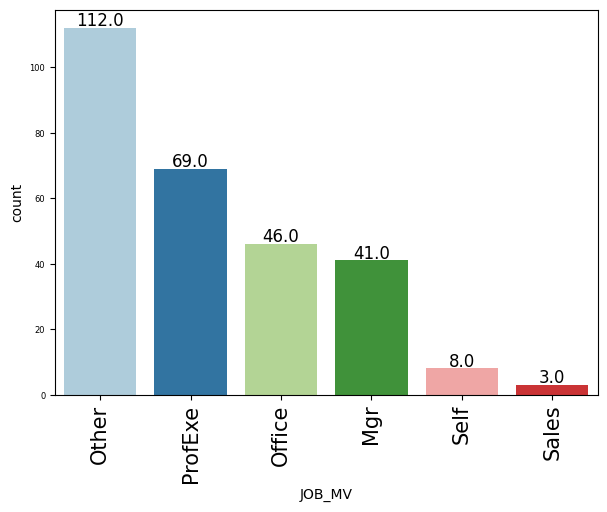

The number of missing values in JOB_MV is 0


In [ ]:
#visualize the imputed data
df_fill_values=pd.DataFrame(fill_jobvalues, columns=['JOB_MV'])
df_fill_values.head()
labeled_barplot(df_fill_values, 'JOB_MV')

In [ ]:
#update the df with imputed values
df_nomv.loc[df_nomv['JOB'].isnull(), 'JOB'] = fill_jobvalues

In [ ]:
df_nomv.isnull().sum()#check for missing values

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB           0
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


#### REASON can have the same treatment.

In [ ]:
#divide missing values of the reason variable
non_missing_reasdata=df_nomv['REASON'].dropna()
missing_reasdata = df_nomv['REASON'].isnull().sum()
distribution = non_missing_reasdata.value_counts(normalize=True)

In [ ]:
non_missing_reasdata.shape

(5708,)

In [ ]:
missing_reasdata

252

In [ ]:
distribution# distribution of the REASON data

REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64

In [ ]:
#input missing values based on the datas distribution
fill_reasvalues = np.random.choice(distribution.index, size=missing_reasdata, p=distribution.values)

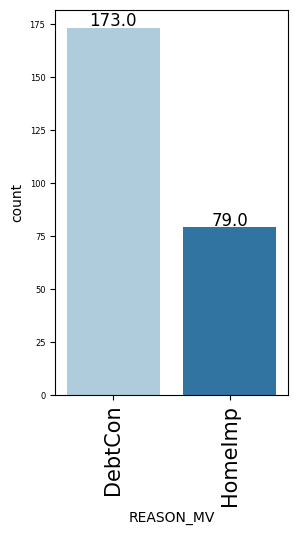

The number of missing values in REASON_MV is 0


In [ ]:
#Visualize the imputed data
df_fill_values=pd.DataFrame(fill_reasvalues, columns=['REASON_MV'])
df_fill_values.head()
labeled_barplot(df_fill_values, 'REASON_MV')

In [ ]:
#update the dataframe with missing values
df_nomv.loc[df_nomv['REASON'].isnull(), 'REASON'] = fill_reasvalues

In [ ]:
df_nomv.isnull().sum()#check for missing values

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON        0
JOB           0
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

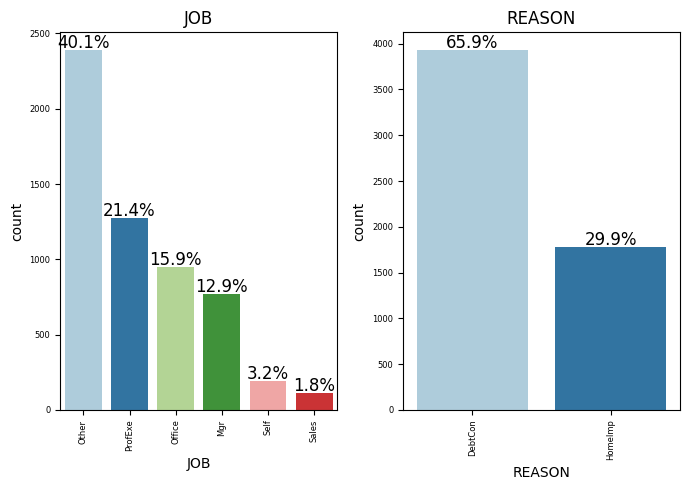

In [ ]:
labeled_barplots2(df, ['JOB', 'REASON'])#use barplots2 to visualize bar plots in comparison

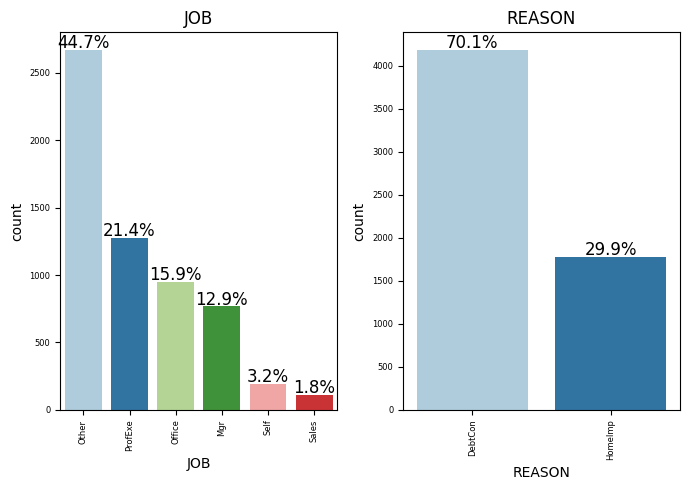

In [ ]:
labeled_barplots2(df_nomv_modemedian, ['JOB', 'REASON'])#use barplots2 to visualize bar plots in comparison

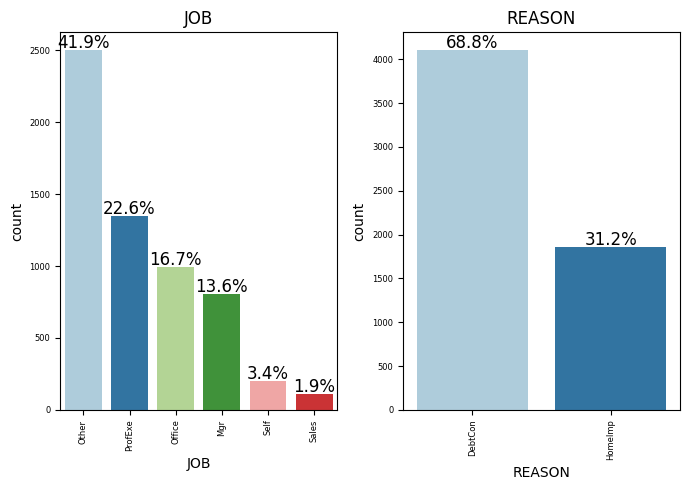

In [ ]:
labeled_barplots2(df_nomv, ['JOB', 'REASON'])#use barplots2 to visualize bar plots in comparison

### KNN

In [ ]:
new_df_nomv=df_nomv.copy()#create a copy to drop cat data

In [ ]:
new_df_nomv.drop(['BAD','JOB','REASON'], axis=1, inplace=True)#drop cat data

In [ ]:
new_df_nomv.isnull().sum()#checking no cat data can be seen

LOAN          0
MORTDUE     518
VALUE       112
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
#Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df_nomv)
df_scaled = pd.DataFrame(df_scaled, columns=new_df_nomv.columns)

In [ ]:
# Apply KNN
knn_imputer = KNNImputer(n_neighbors=5)
imputed_vals = knn_imputer.fit_transform(df_scaled)

In [ ]:
#save imputed values in a dataframe
df_imputed_vals=pd.DataFrame(imputed_vals, columns=['LOAN','MORTDUE','VALUE','YOJ', 'DEROG','DELINQ','CLAGE','NINQ', 'CLNO','DEBTINC'])
df_imputed_vals.info()#check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   YOJ      5960 non-null   float64
 4   DEROG    5960 non-null   float64
 5   DELINQ   5960 non-null   float64
 6   CLAGE    5960 non-null   float64
 7   NINQ     5960 non-null   float64
 8   CLNO     5960 non-null   float64
 9   DEBTINC  5960 non-null   float64
dtypes: float64(10)
memory usage: 465.8 KB


In [ ]:
df_imputed_vals.head()

LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ     CLAGE  \
0 -1.562299 -1.077548 -1.114102  0.208329 -0.300922 -0.398738 -0.996543   
1 -1.544453 -0.083409 -0.591778 -0.253822 -0.300922  1.375631 -0.675991   
2 -1.526606 -1.355591 -1.511069 -0.649951 -0.300922 -0.398738 -0.353493   
3 -1.526606 -0.487044 -0.760852 -0.438682  0.408326  0.311009 -0.829966   
4 -1.508759  0.540771  0.183485 -0.781994 -0.300922 -0.398738 -1.008602   

       NINQ      CLNO   DEBTINC  
0 -0.107639 -1.212866  0.378144  
1 -0.686169 -0.719675 -1.042436  
2 -0.107639 -1.114228  1.411158  
3 -0.339051 -0.857768 -0.710506  
4 -0.686169 -0.719675 -0.386679

In [ ]:
df_imputed_vals.loc[:, "JOB"] = df_nomv['JOB']#Add job column

In [ ]:
df_imputed_vals.loc[:, "REASON"] = df_nomv['REASON']#Add Reason column

In [ ]:
df_imputed_vals.loc[:, "BAD"] = df_nomv['BAD']#Add BAD column

In [ ]:
df_imputed_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   YOJ      5960 non-null   float64
 4   DEROG    5960 non-null   float64
 5   DELINQ   5960 non-null   float64
 6   CLAGE    5960 non-null   float64
 7   NINQ     5960 non-null   float64
 8   CLNO     5960 non-null   float64
 9   DEBTINC  5960 non-null   float64
 10  JOB      5960 non-null   object 
 11  REASON   5960 non-null   object 
 12  BAD      5960 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 605.4+ KB


## Comparison of missing values treating.

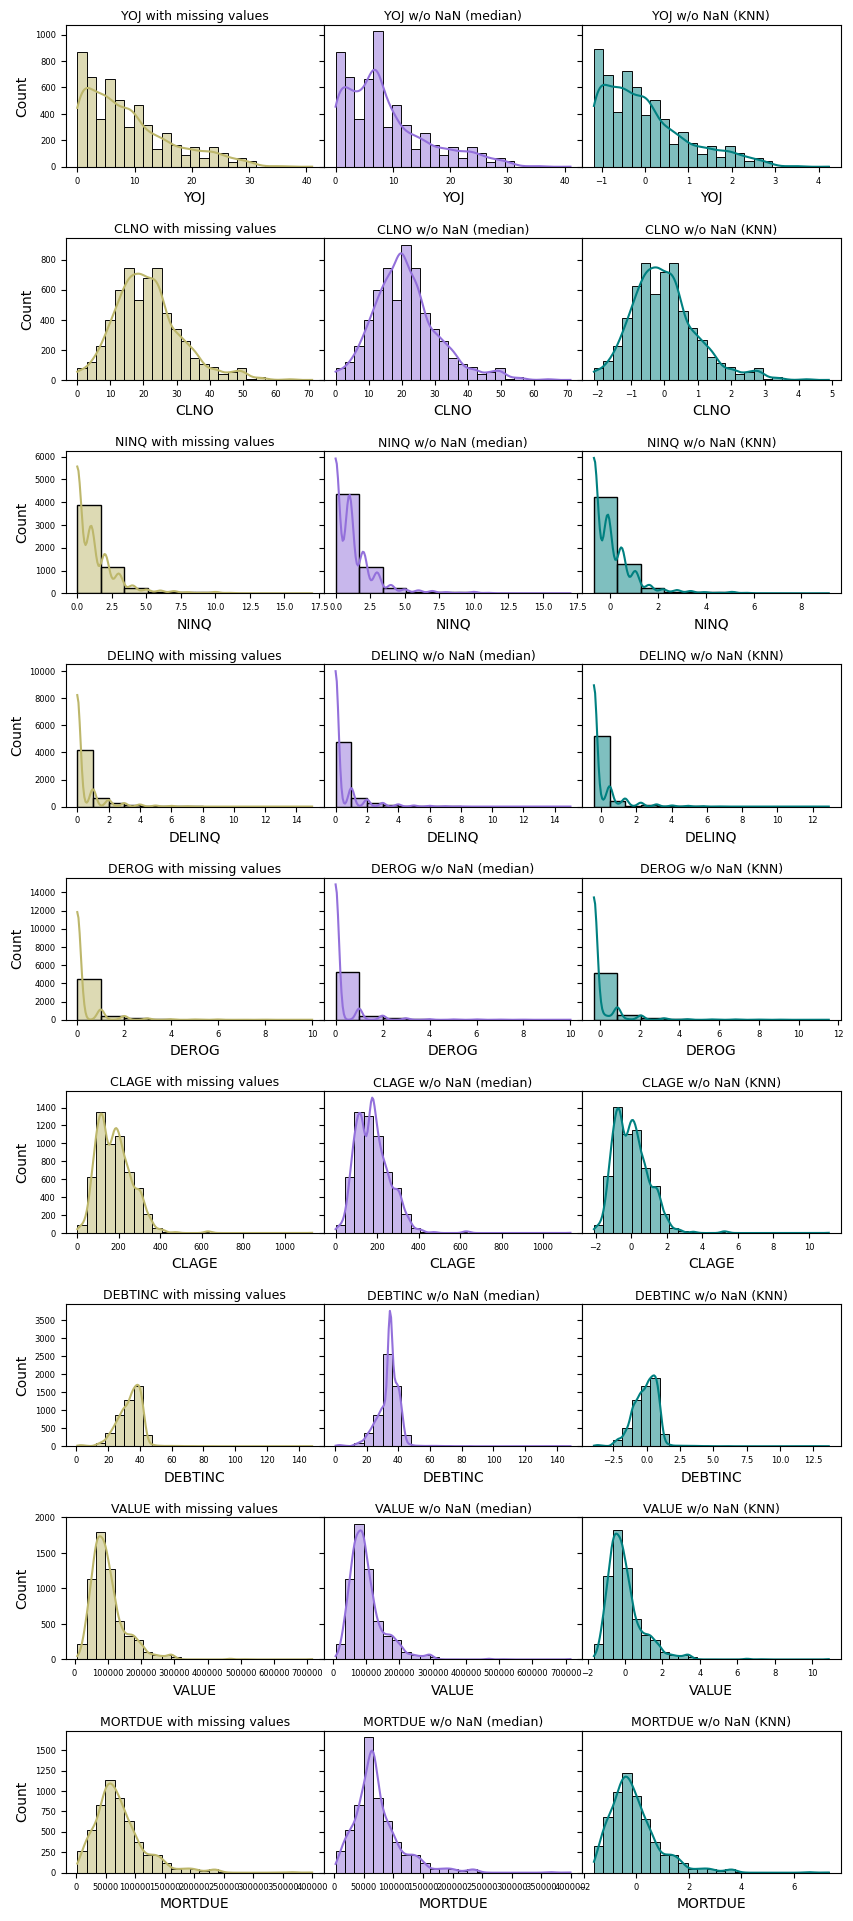

In [ ]:
# Figure to plot all the features to compare trends

fig = plt.figure(layout='tight', figsize = (10, 24))
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

gs = fig.add_gridspec(9, 3, hspace=0.5, wspace=0)
axs = gs.subplots( sharey='row')
#fig.suptitle('Comparing Missing Values Treated with median')

axs[0,0].set_title('YOJ with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'YOJ', kde=True, ax = axs[0,0], bins=25, color="darkkhaki");
axs[0,1].set_title('YOJ w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'YOJ', kde=True, ax = axs[0,1], bins=25, color="mediumpurple");
axs[0,2].set_title('YOJ w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'YOJ', kde=True, ax = axs[0,2], bins=25, color="teal");

axs[1,0].set_title('CLNO with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'CLNO', kde=True, ax = axs[1,0], bins=25, color="darkkhaki");
axs[1,1].set_title('CLNO w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'CLNO', kde=True, ax = axs[1,1], bins=25, color="mediumpurple");
axs[1,2].set_title('CLNO w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'CLNO', kde=True, ax = axs[1,2], bins=25, color="teal");

axs[2,0].set_title('NINQ with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'NINQ', kde=True, ax = axs[2,0], bins=10, color="darkkhaki");
axs[2,1].set_title('NINQ w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'NINQ', kde=True, ax = axs[2,1], bins=10, color="mediumpurple");
axs[2,2].set_title('NINQ w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'NINQ', kde=True, ax = axs[2,2], bins=10, color="teal");

axs[3,0].set_title('DELINQ with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'DELINQ', kde=True, ax = axs[3,0], bins=15, color="darkkhaki");
axs[3,1].set_title('DELINQ w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'DELINQ', kde=True, ax = axs[3,1], bins=15, color="mediumpurple");
axs[3,2].set_title('DELINQ w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'DELINQ', kde=True, ax = axs[3,2], bins=15, color="teal");

axs[4,0].set_title('DEROG with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'DEROG', kde=True, ax = axs[4,0], bins=10, color="darkkhaki");
axs[4,1].set_title('DEROG w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'DEROG', kde=True, ax = axs[4,1], bins=10, color="mediumpurple");
axs[4,2].set_title('DEROG w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'DEROG', kde=True, ax = axs[4,2], bins=10, color="teal");

axs[5,0].set_title('CLAGE with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'CLAGE', kde=True, ax = axs[5,0], bins=25, color="darkkhaki" );
axs[5,1].set_title('CLAGE w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'CLAGE', kde=True, ax = axs[5,1], bins=25, color="mediumpurple");
axs[5,2].set_title('CLAGE w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'CLAGE', kde=True, ax = axs[5,2], bins=25, color="teal");

axs[6,0].set_title('DEBTINC with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'DEBTINC', kde=True, ax = axs[6,0], bins=25, color="darkkhaki");
axs[6,1].set_title('DEBTINC w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'DEBTINC', kde=True, ax = axs[6,1], bins=25, color="mediumpurple");
axs[6,2].set_title('DEBTINC w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'DEBTINC', kde=True, ax = axs[6,2], bins=25, color="teal");

axs[7,0].set_title('VALUE with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'VALUE', kde=True, ax = axs[7,0], bins=25, color="darkkhaki");
axs[7,1].set_title('VALUE w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'VALUE', kde=True, ax = axs[7,1], bins=25, color="mediumpurple");
axs[7,2].set_title('VALUE w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'VALUE', kde=True, ax = axs[7,2], bins=25, color="teal");

axs[8,0].set_title('MORTDUE with missing values', ha='center', va='center', fontsize=9)
sns.histplot(data = df, x = 'MORTDUE', kde=True, ax = axs[8,0], bins=25, color="darkkhaki");
axs[8,1].set_title('MORTDUE w/o NaN (median)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_nomv_modemedian, x = 'MORTDUE', kde=True, ax = axs[8,1], bins=25, color="mediumpurple");
axs[8,2].set_title('MORTDUE w/o NaN (KNN)', ha='center', va='center', fontsize=9)
sns.histplot(data = df_imputed_vals, x = 'MORTDUE', kde=True, ax = axs[8,2], bins=25, color="teal");



Missing values are filled and the original patterns of the data has been secured. So far we have 4 dataframes,
* **df_copy** : original data
* **df_outliers_trated** : data frame with treated outliers.
* **df_nomv_modemedian** : data fram w/o missing values using mode aand median,
* **df_imputed_vals** : data frame w/o missing values using KNN for numerical variables and imputing by distribution of categorical variables.

# **Important Insights from EDA**

* There are only 2 object/string, JOB and REASON.
* DEROG, DELINQ, and NINQ, could be seen/treated as categorical variables.
* BAD is a flag variable, or categorical, indicating if the user has defaulted on the loan (1) or if it has payed the loan (0).
* There are a lot of missing values, althoug none of them seem to be greater than 50% of the data, so i will try to treat them.
* Clients who defaulted on a loan had a range of DELINQ from 0-15. Meanwhile those who repaid their loan had a range of DELINQ of 0-5.
* Similarly, clients who defaulted on a loan had a range of DEROG from 0-10. Meanwhile those who repaid their loan had a range of DEROG of 0-6.
* The most common category in JOB is Other, with 40% of the data; the second most common is ProfExe with 21.4%; the third one is office with 15.9%
* There are only 2 categories in reason, 1 is for DebtCon (65.91%) and 2 is HomeImp (29.87).
* The REASON for loan default, DebtCon or HomeImp, is very fairly distributed.
* Sales is the JOB most prone to loan default.
* Loan default is correlated to DELINQ, DEROG, DEBTINC, NINQ. And it is not correlated to CLAGE, LOAN, YOJ, MORTDUE, VALUE.

## From missing values
* only 7 clients who repaid their loan "forgot" or did not input any VALUE of property. Meanwhile, 105 clients who defaulted on a loan did not input any VALUE of property.

* 412 clients who repaid their loan did not input any MORTDUE for their property. Meanwhile, 106 clients who defaulted on a loan did not input any MORTDUE for their property.

* There is a similitude in missing value for defaulted clients on VALUE and MORTDUE, this could be because if you dont own any property, you should not have an MORTDUE.

* 450 clients who repaid their loan did not input any YOJ, years in a job. Meanwhile, 65 clients who defaulted on a loan did not input any YOJ.

* 508 clients who repaid their loan did not input any DELINQ credit lines. Meanwhile, 72 clients who defaulted on a loan did not input any DELINQ credit lines.

* 621 clients who repaid their loan did not input any DEROG cases, related to any delinquency or late payment. Meanwhile, 87 clients who defaulted on a loan did not input any DEROG cases.

* 230 clients who repaid their loan did not input any CLAGE, oldest creditline in months. Meanwhile, 78 clients who defaulted on a loan did not input any CALGE.

* 435 clients who repaid their loan did not input any NINQ: Number of recent credit inquiries. Meanwhile, 75 clients who defaulted on a loan did not input any NINQ.

* 169 clients who repaid their loan did not input any CLNO: Number of recent credit inquiries. Meanwhile, 53 clients who defaulted on a loan did not input any CLNO.

* 481 clients who repaid their loan did not input any DEBTINC: Debt-to-income ratio. Meanwhile, 786 clients who defaulted on a loan did not input any DEBTINC.

## Outliers

* Clage and Debtinc have outlier worth treating. Value has outliers but those are real values so they will not be treated. Mortdue has outliers but they are also real values so they wont be treated either.

* We treated the outliers with the 5th and 95th percentile on all numerical variables. After further analysis. It is believed that VALUE, MORTDUE, and NINQ could be left untreated because they are real possible values.

## Treating Missing Values

* We can see the distribution of the job data in the univariate and bivariate analysis. We filled/imputed the missing values of JOB based on said distribution.

* We did the same for the other categorical variable, REASON.

* Using KNN, the rest of numerical Missing values are filled and the original patterns of the data has been secured.


In [ ]:
dfmax=df['MORTDUE'].max()
print(df[df['MORTDUE']>dfmax*0.95])

      BAD   LOAN   MORTDUE     VALUE   REASON      JOB  YOJ  DEROG  DELINQ  \
2522    1  15000  399550.0       NaN  HomeImp      Mgr  0.9    0.0     0.0   
5545    1  35000  391000.0  505000.0  DebtCon  ProfExe  4.5    0.0     0.0   
5586    1  36600  397299.0  512650.0  DebtCon  ProfExe  4.0    0.0     0.0   
5638    1  39000  399412.0  511164.0  DebtCon  ProfExe  5.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
2522  138.166667   1.0  18.0        NaN  
5545  192.766667   0.0  22.0        NaN  
5586  197.516684   0.0  21.0  43.458327  
5638  181.962401   0.0  21.0  43.730032  


In [ ]:
dfmax=df['VALUE'].max()
print(df[df['VALUE']>dfmax*0.7])

      BAD   LOAN   MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
5545    1  35000  391000.0  505000.0  DebtCon  ProfExe   4.5    0.0     0.0   
5586    1  36600  397299.0  512650.0  DebtCon  ProfExe   4.0    0.0     0.0   
5638    1  39000  399412.0  511164.0  DebtCon  ProfExe   5.0    0.0     0.0   
5665    1  40000       NaN  685513.7  HomeImp    Other  17.0    0.0     0.0   
5706    1  41700       NaN  685513.7  HomeImp    Other  16.0    0.0     0.0   
5707    1  41700       NaN  685513.7  HomeImp    Other  18.0    0.0     0.0   
5752    1  43500       NaN  685513.7  HomeImp    Other  16.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5545  192.766667   0.0  22.0        NaN  
5586  197.516684   0.0  21.0  43.458327  
5638  181.962401   0.0  21.0  43.730032  
5665  186.666667   1.0  24.0        NaN  
5706  180.608878   0.0  23.0  42.071645  
5707  189.099378   1.0  23.0  43.258779  
5752  196.403636   0.0  23.0  42.985408  


In [ ]:
dfmax=df['YOJ'].max()
print(df[df['YOJ']>dfmax*0.9])

      BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
1827    1  12300  77000.0   94000.0  DebtCon     Mgr  41.0    NaN     4.0   
3160    1  17000  74910.0  112375.0  DebtCon  Office  41.0    0.0     0.0   
3870    1  20200  82181.0  119535.0  DebtCon  Office  41.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
1827  212.866667   4.0  17.0        NaN  
3160   95.200000   3.0  28.0        NaN  
3870  105.219297   3.0  28.0  52.734861  


In [ ]:
dfmax=df['CLAGE'].max()
print(df[df['CLAGE']>dfmax*0.8])

      BAD   LOAN  MORTDUE     VALUE   REASON    JOB  YOJ  DEROG  DELINQ  \
3097    1  16800  87300.0  155500.0  DebtCon  Other  3.0    0.0     0.0   
3679    1  19300  96454.0  157809.0  DebtCon  Other  3.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
3097  953.498361   0.0   0.0        NaN  
3679  953.498361   0.0   0.0  40.206138  


In [ ]:
dfmax=df['CLNO'].max()
print(df[df['CLNO']>dfmax*0.8])

      BAD   LOAN   MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
1463    1  11000   66400.0   81500.0  DebtCon    Other   9.5    0.0     0.0   
2054    1  13000  111000.0  137813.0      NaN      Mgr   6.0    2.0     2.0   
2177    1  13500   83673.0  109000.0  HomeImp      Mgr   2.3    0.0     1.0   
2413    1  14500  149000.0       NaN  DebtCon  ProfExe  25.0    0.0     2.0   
2794    1  15700  149305.0       NaN  DebtCon  ProfExe  25.0    0.0     2.0   
3094    1  16800  113021.0  146222.0      NaN      Mgr   5.0    3.0     2.0   
3471    1  18300   60100.0   82506.0  DebtCon  ProfExe  10.0    3.0     1.0   
3604    1  18900   61429.0   84990.0  DebtCon  ProfExe   8.0    3.0     1.0   
3884    1  20300   66667.0   92158.0  DebtCon  ProfExe   9.0    3.0     1.0   
4001    1  20900   61402.0   88659.0  DebtCon  ProfExe   9.0    3.0     0.0   
4935    1  26000  154000.0  190000.0      NaN    Other   0.0    0.0     4.0   
5204    1  28100   72100.0  112000.0  DebtCon  ProfE

In [ ]:
dfmax=df['DEBTINC'].max()
print(dfmax)
print(df[df['DEBTINC']>50])

103.13607557763997
      BAD   LOAN   MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
216     1   5200   40564.0   39527.0  HomeImp    Other   0.0    0.0     0.0   
414     1   6500  183860.0  208910.0  DebtCon  ProfExe   4.0    6.0     0.0   
437     1   6700       NaN   20631.0  HomeImp      Mgr   4.0    0.0     0.0   
1072    1   9700   32660.0   54536.0  DebtCon   Office   0.0    0.0     0.0   
1102    1   9900   37609.0  120186.0  DebtCon    Other   NaN    0.0     0.0   
1268    1  10300   70147.0  122124.0  HomeImp    Other   1.0    0.0     0.0   
1395    1  10800   35602.0   73077.0  DebtCon     Self   NaN    0.0     1.0   
1601    1  11600   57939.0   69774.0  DebtCon      Mgr   5.0    0.0     0.0   
1633    1  11700   63914.0   93707.0  DebtCon    Other   7.0    3.0     0.0   
1645    1  11800   74512.0   93328.0  HomeImp   Office   4.0    5.0     0.0   
1708    1  12000   76345.0   89036.0  HomeImp    Other   8.0    0.0     0.0   
1760    1  12000   48189.0   5396

# **Model Building**


### Train_Test_split


Data is already scaled, therefore we can use the no missing values data frames to build the models. First we get the dummy variables.

In [ ]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['JOB']
df_=df_imputed_vals.copy()
# Creating dummy variables
df_ = pd.get_dummies(data = df_, columns = to_get_dummies_for, drop_first = True)

# Mapping Reason
dict_REASON = {'DebtCon': 1, 'HomeImp': 0}

df_['REASON'] = df_.REASON.map(dict_REASON)

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOAN         5960 non-null   float64
 1   MORTDUE      5960 non-null   float64
 2   VALUE        5960 non-null   float64
 3   YOJ          5960 non-null   float64
 4   DEROG        5960 non-null   float64
 5   DELINQ       5960 non-null   float64
 6   CLAGE        5960 non-null   float64
 7   NINQ         5960 non-null   float64
 8   CLNO         5960 non-null   float64
 9   DEBTINC      5960 non-null   float64
 10  REASON       5960 non-null   int64  
 11  BAD          5960 non-null   int64  
 12  JOB_Office   5960 non-null   bool   
 13  JOB_Other    5960 non-null   bool   
 14  JOB_ProfExe  5960 non-null   bool   
 15  JOB_Sales    5960 non-null   bool   
 16  JOB_Self     5960 non-null   bool   
dtypes: bool(5), float64(10), int64(2)
memory usage: 588.0 KB


In [ ]:
# Separating the target variable and other variables
Y = df_.BAD
X = df_.drop(columns = ['BAD'])

In [ ]:
# Splitting the data
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [ ]:
y_train.head()

4039    0
321     0
485     0
3526    0
3900    0
Name: BAD, dtype: int64

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a client will default when the client doesnt default.
2. Predicting a client will not default when the client actually defaults.
* **It is important Predicting that the client will not default but it actually does**, i.e., losing out on a profitable client.
* **We would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives.

In [ ]:
# Function for classification report with confusion matrix
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (4, 4))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['0=RePaid', '1=Default'], yticklabels = ['0=Repaid', '1=Default'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# Function to return classification report

def metrics_score_nc(actual, predicted):
    scores=classification_report(actual, predicted)
    return scores

### Logistic Regression

Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values.

In [ ]:
# Building and Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3340
           1       0.68      0.25      0.37       832

    accuracy                           0.83      4172
   macro avg       0.76      0.61      0.64      4172
weighted avg       0.81      0.83      0.79      4172



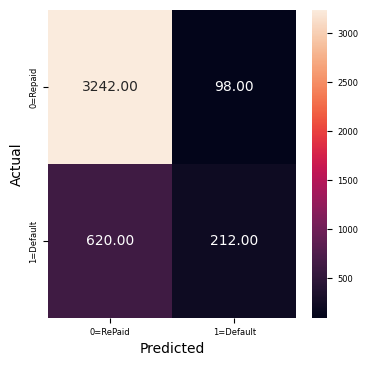

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1431
           1       0.66      0.22      0.33       357

    accuracy                           0.82      1788
   macro avg       0.75      0.60      0.62      1788
weighted avg       0.80      0.82      0.79      1788



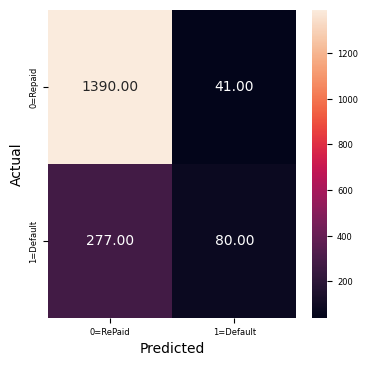

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

Its very bad based on recall, predicting that 277 would repay and they actually defaulted.

Let's check the coefficients and find which variables are leading to defaulting.

In [ ]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

0
DELINQ       0.732136
JOB_Sales    0.722423
DEROG        0.374986
JOB_Self     0.361829
VALUE        0.215916
NINQ         0.183957
DEBTINC      0.046421
JOB_Other    0.020000
CLNO        -0.084256
YOJ         -0.136881
JOB_ProfExe -0.167410
MORTDUE     -0.194089
LOAN        -0.207228
REASON      -0.221791
CLAGE       -0.412625
JOB_Office  -0.448537

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [ ]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

odds
DELINQ       2.079518
JOB_Sales    2.059416
DEROG        1.454971
JOB_Self     1.435954
VALUE        1.240998
NINQ         1.201964
DEBTINC      1.047515
JOB_Other    1.020202
CLNO         0.919196
YOJ          0.872074
JOB_ProfExe  0.845853
MORTDUE      0.823585
LOAN         0.812835
REASON       0.801083
CLAGE        0.661910
JOB_Office   0.638562

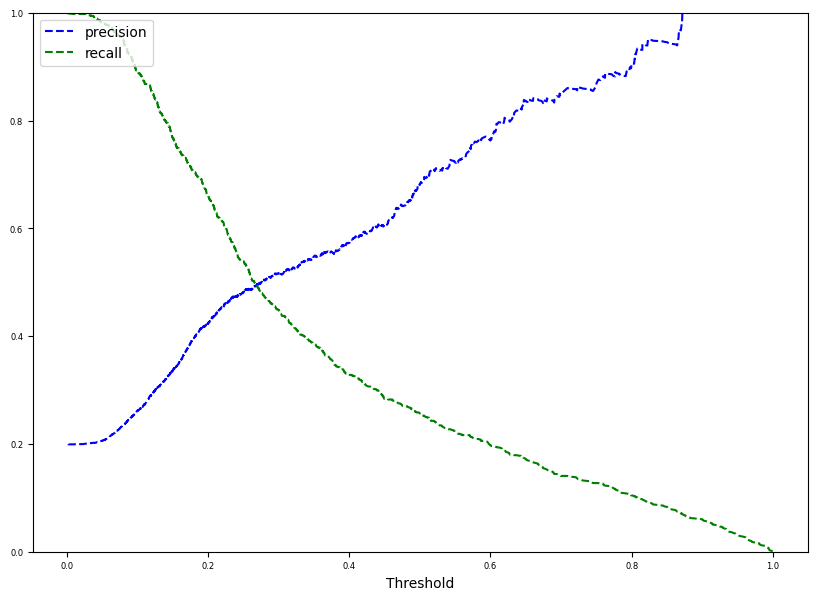

In [ ]:
# Figure to plot Recall-Precision curve

y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      3340
           1       0.42      0.66      0.52       832

    accuracy                           0.75      4172
   macro avg       0.66      0.72      0.68      4172
weighted avg       0.81      0.75      0.77      4172



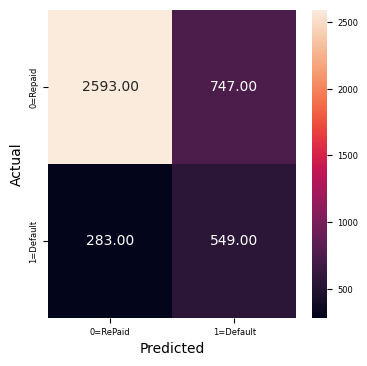

In [ ]:
#Re training the model with optimal threshhold
optimal_threshold1 = .2

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1431
           1       0.42      0.62      0.50       357

    accuracy                           0.75      1788
   macro avg       0.65      0.70      0.67      1788
weighted avg       0.80      0.75      0.77      1788



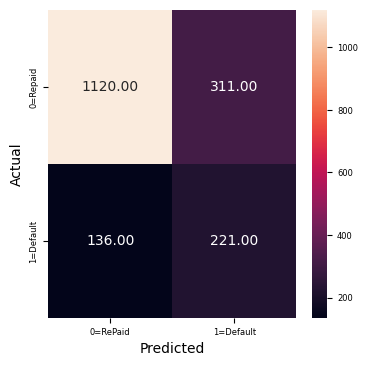

In [ ]:
optimal_threshold1 = .2

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

It improved a lot based on Recall, predicting that 136 would repay and they actually defaulted.

### Decision Tree

In [ ]:
#First decision tree train
dt_classif= DecisionTreeClassifier(random_state=1)
dt_classif.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



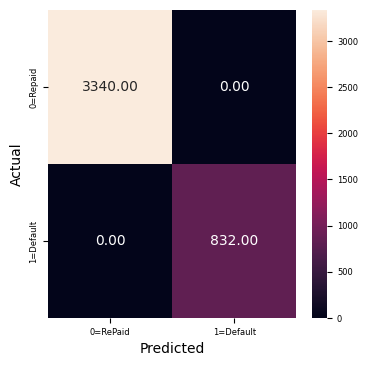

In [ ]:
# predicting decision tree 1 on train
y1 = dt_classif.predict(x_train)
metrics_score(y_train, y1)

The model is Overfitting

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1431
           1       0.65      0.62      0.64       357

    accuracy                           0.86      1788
   macro avg       0.78      0.77      0.77      1788
weighted avg       0.86      0.86      0.86      1788



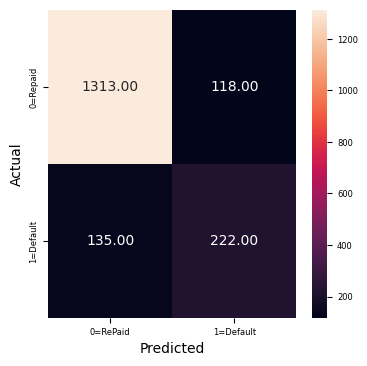

In [ ]:
# predicting decision tree 1 on test
y1_test = dt_classif.predict(x_test)
metrics_score(y_test, y1_test)

#### **Decision Tree - Hyperparameter Tuning**


In [ ]:
hyper1 = {"max_depth": [None, 2, 5,6],
    "min_samples_leaf": [1, 5, 15],
    "max_features": [1, 0.2, 0.4, 0.7],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
}

In [ ]:
#hyperparameter tunning DEcision Tree
DT_y1_tuned=DecisionTreeClassifier(random_state=1)

In [ ]:
# Search for best parameters
DT_gridsearch=GridSearchCV(DT_y1_tuned, hyper1, scoring= 'recall', cv=5)
DT_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', {0: 0.3, 1: 0.7}],
                         'max_depth': [None, 2, 5, 6],
                         'max_features': [1, 0.2, 0.4, 0.7],
                         'min_samples_leaf': [1, 5, 15]},
             scoring='recall')

In [ ]:
#Get the best parameters
dt_classifier_best= DT_gridsearch.best_estimator_
dt_classifier_best.fit(x_train, y_train)
#(class_weight='balanced',max_features=0.7,min_samples_leaf=15, random_state=1)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=0.4,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1431
           1       0.34      0.73      0.46       357

    accuracy                           0.66      1788
   macro avg       0.62      0.69      0.61      1788
weighted avg       0.79      0.66      0.69      1788



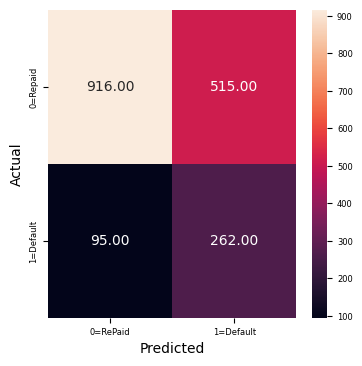

In [ ]:
y1best_test = dt_classifier_best.predict(x_test)
metrics_score(y_test, y1best_test)

In [ ]:
91*100/1788

5.089485458612975

In [ ]:
_df=df_.drop(columns = ['BAD'])
_df_y=df_.BAD

In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1788 entries, 4394 to 4924
Series name: BAD
Non-Null Count  Dtype
--------------  -----
1788 non-null   int64
dtypes: int64(1)
memory usage: 27.9 KB


              precision    recall  f1-score   support

           0       0.92      0.64      0.75      4771
           1       0.35      0.79      0.49      1189

    accuracy                           0.67      5960
   macro avg       0.64      0.71      0.62      5960
weighted avg       0.81      0.67      0.70      5960



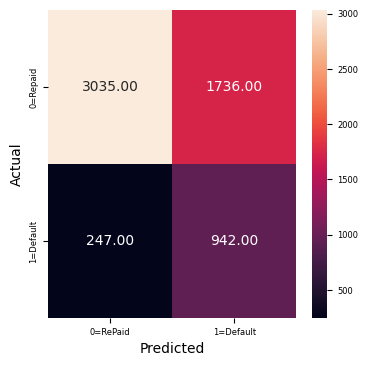

In [ ]:
y1best_test_ = dt_classifier_best.predict(_df)
metrics_score(_df_y, y1best_test_)

In [ ]:
942+247

1189

In [ ]:
y1_test_perf=metrics_score_nc(y_test, y1_test) ##Decision tree Metrics
y1_testbest_perf=metrics_score_nc(y_test, y1best_test)
print(f'Decision Tree 1 \n {y1_test_perf}\n', f'Decision Tree Best \n {y1_testbest_perf}')

Decision Tree 1 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1431
           1       0.65      0.62      0.64       357

    accuracy                           0.86      1788
   macro avg       0.78      0.77      0.77      1788
weighted avg       0.86      0.86      0.86      1788

 Decision Tree Best 
               precision    recall  f1-score   support

           0       0.91      0.64      0.75      1431
           1       0.34      0.73      0.46       357

    accuracy                           0.66      1788
   macro avg       0.62      0.69      0.61      1788
weighted avg       0.79      0.66      0.69      1788



Based on recall, the tuned decision tree performed better thsn the logistic refression, with a recall score of 0.74. And 93 predicted to repaid that actually defaulted.

In [ ]:
# Get the names of the feautres of the data in a list
features= list(x_train.columns)
features

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC',
 'REASON',
 'JOB_Office',
 'JOB_Other',
 'JOB_ProfExe',
 'JOB_Sales',
 'JOB_Self']

In [ ]:
#Visualizing decision tree in text format
print(tree.export_text(dt_classifier_best, feature_names=features, show_weights=True))

|--- DEROG <= 0.76
|   |--- DEBTINC <= 1.35
|   |   |--- DELINQ <= 0.04
|   |   |   |--- CLAGE <= -0.05
|   |   |   |   |--- LOAN <= -0.32
|   |   |   |   |   |--- weights: [311.03, 368.56] class: 1
|   |   |   |   |--- LOAN >  -0.32
|   |   |   |   |   |--- weights: [413.45, 145.42] class: 0
|   |   |   |--- CLAGE >  -0.05
|   |   |   |   |--- YOJ <= -0.51
|   |   |   |   |   |--- weights: [276.05, 112.82] class: 0
|   |   |   |   |--- YOJ >  -0.51
|   |   |   |   |   |--- weights: [557.10, 100.29] class: 0
|   |   |--- DELINQ >  0.04
|   |   |   |--- LOAN <= -1.12
|   |   |   |   |--- JOB_Office <= 0.50
|   |   |   |   |   |--- weights: [13.12, 90.26] class: 1
|   |   |   |   |--- JOB_Office >  0.50
|   |   |   |   |   |--- weights: [3.12, 2.51] class: 0
|   |   |   |--- LOAN >  -1.12
|   |   |   |   |--- DEBTINC <= -0.92
|   |   |   |   |   |--- weights: [39.35, 175.50] class: 1
|   |   |   |   |--- DEBTINC >  -0.92
|   |   |   |   |   |--- weights: [269.81, 300.87] class: 1
|   |--

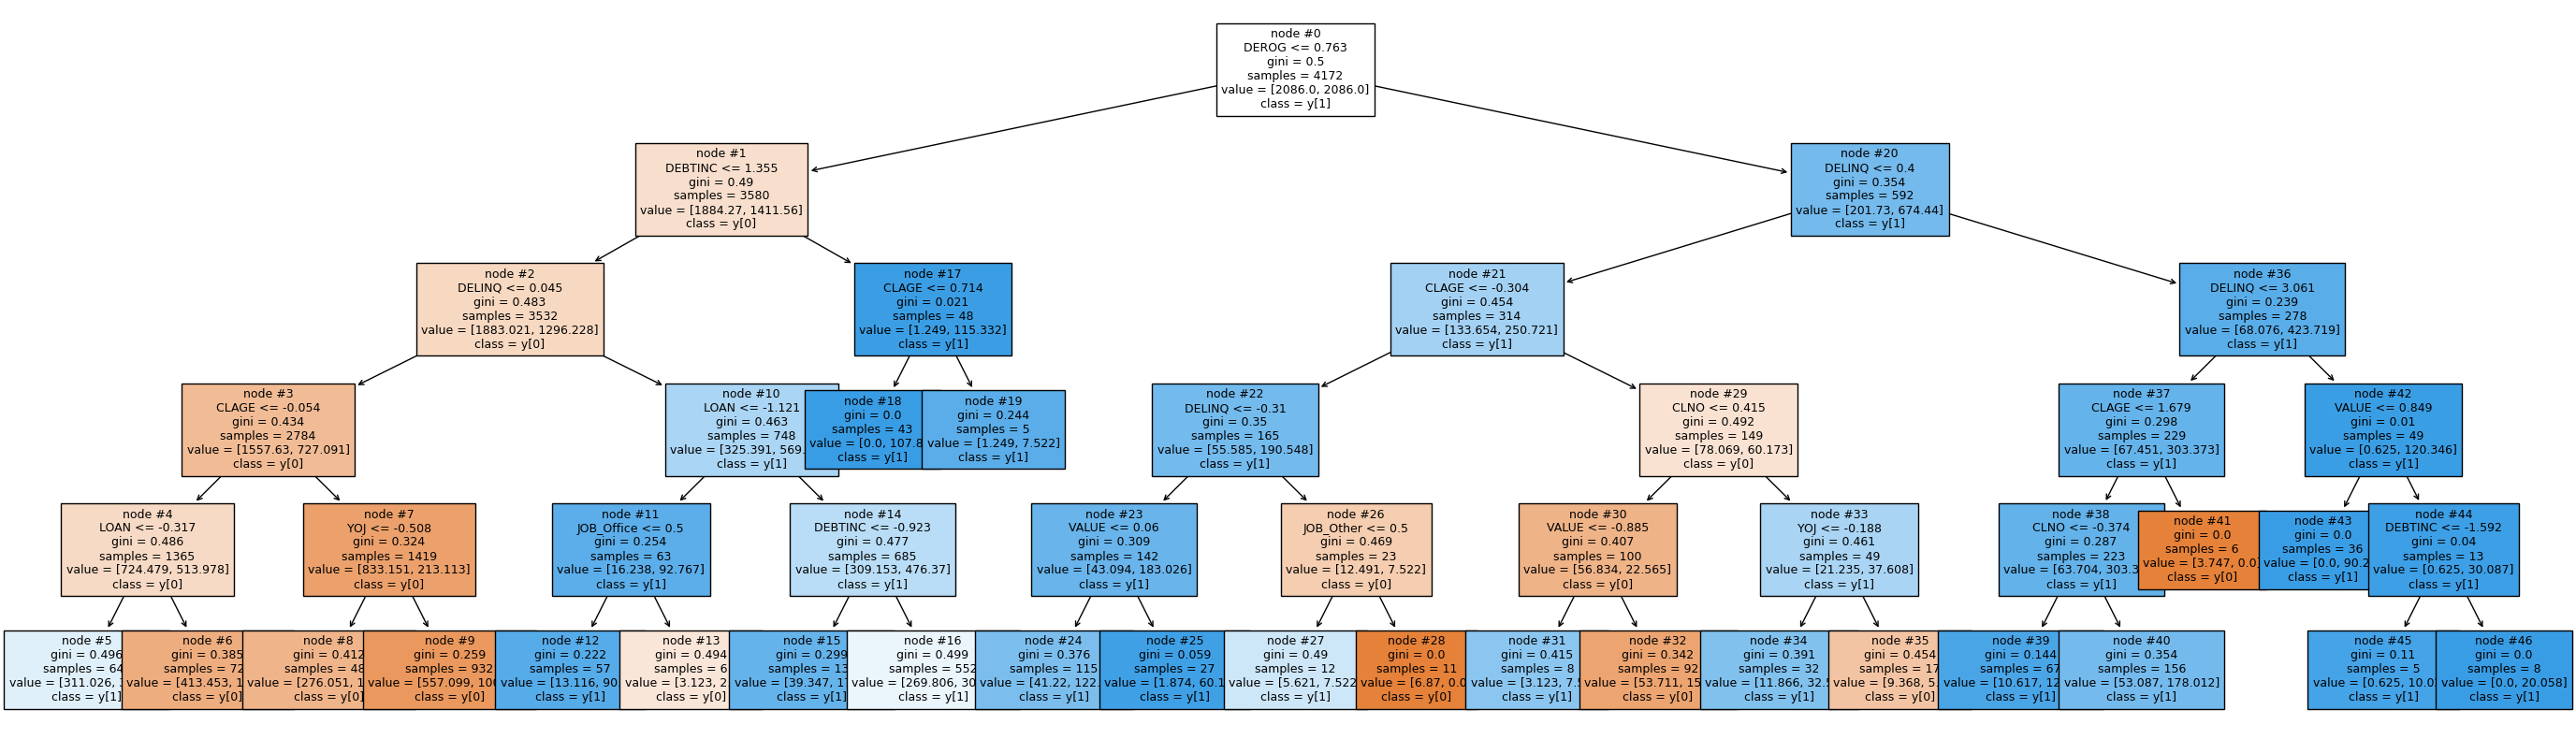

In [ ]:
#Visualize the decision tree
plt.figure(figsize=(35,10))
tree.plot_tree(dt_classifier_best, feature_names=features, filled=True, fontsize=9, node_ids=True, class_names=True);

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

We can use ensemble methods to add many weak predictors to get better and more robust results. Also we want to prevent any overfitting. The ensemble methods used will be:
* Bagging:
* Random Forest:
* AdaBoost
* GradientBoosting
* XGBoost

#### BAGGING

In [ ]:
#bagging, train the model
baggin_est=BaggingClassifier(random_state=1)
baggin_est.fit(x_train, y_train)

BaggingClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3340
           1       1.00      0.96      0.98       832

    accuracy                           0.99      4172
   macro avg       0.99      0.98      0.99      4172
weighted avg       0.99      0.99      0.99      4172



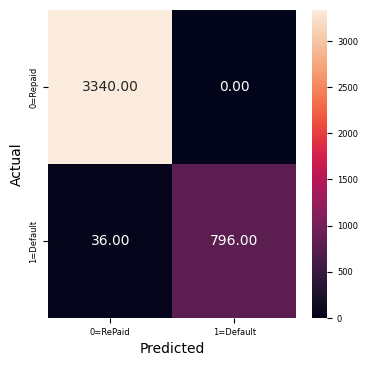

In [ ]:
#bagging checkin metrics on trained data
y3 = baggin_est.predict(x_train)

metrics_score(y_train, y3)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1431
           1       0.90      0.54      0.67       357

    accuracy                           0.90      1788
   macro avg       0.90      0.76      0.81      1788
weighted avg       0.90      0.90      0.89      1788



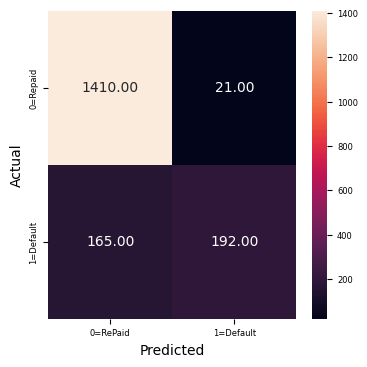

In [ ]:
#bagging, getting metrics on the test data
y3_test = baggin_est.predict(x_test)
metrics_score(y_test, y3_test)

The bagging method has a recall score of 0.51. And 174 predicted to repaid that actually defaulted.

#### Random Forest

In [ ]:
#random forest 1 train
randForest_est=RandomForestClassifier(random_state=1)
randForest_est.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



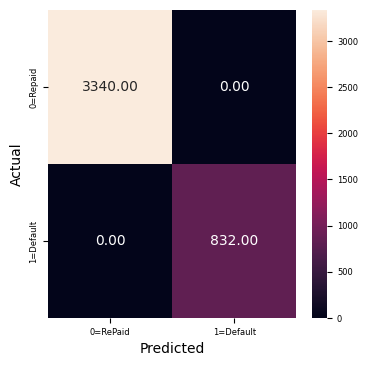

In [ ]:
#random forest 1, checking metrics on train data
y4 = randForest_est.predict(x_train)

metrics_score(y_train, y4)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1431
           1       0.95      0.57      0.72       357

    accuracy                           0.91      1788
   macro avg       0.93      0.78      0.83      1788
weighted avg       0.91      0.91      0.90      1788



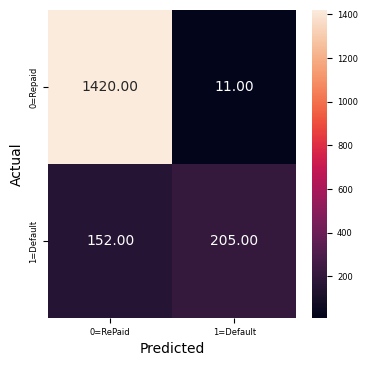

In [ ]:
#random forest 1, on test
y4_test = randForest_est.predict(x_test)
metrics_score(y_test, y4_test)

The Random Forest method has a recall score of 0.55. And 160 predicted to repaid that actually defaulted.

#### ADABoost

In [ ]:
#Training AdaBoost model
ada_classif=AdaBoostClassifier(random_state=1)
ada_classif.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3340
           1       0.75      0.45      0.56       832

    accuracy                           0.86      4172
   macro avg       0.81      0.71      0.74      4172
weighted avg       0.85      0.86      0.85      4172



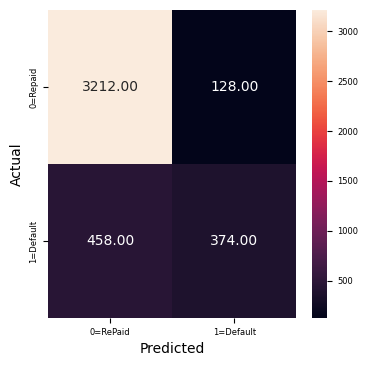

In [ ]:
#Adaboost 1, on train
y5 = ada_classif.predict(x_train)

metrics_score(y_train, y5)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1431
           1       0.74      0.38      0.50       357

    accuracy                           0.85      1788
   macro avg       0.80      0.67      0.71      1788
weighted avg       0.84      0.85      0.83      1788



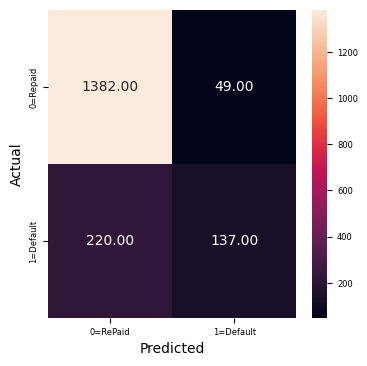

In [ ]:
#Adaboost 1, on test
y5_test = ada_classif.predict(x_test)
metrics_score(y_test, y5_test)

The ADAboost method has a recall score of 0.41. And 212 predicted to repaid that actually defaulted.

#### GradientBoosting

In [ ]:
#Creating and training GradientBoosting model
Grad_classif=GradientBoostingClassifier(random_state=1)
Grad_classif.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3340
           1       0.96      0.55      0.70       832

    accuracy                           0.91      4172
   macro avg       0.93      0.77      0.82      4172
weighted avg       0.91      0.91      0.89      4172



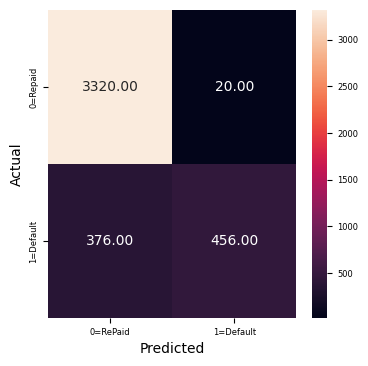

In [ ]:
#Gradient Boosting, on train data
y6 = Grad_classif.predict(x_train)

metrics_score(y_train, y6)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1431
           1       0.87      0.44      0.58       357

    accuracy                           0.87      1788
   macro avg       0.87      0.71      0.75      1788
weighted avg       0.87      0.87      0.86      1788



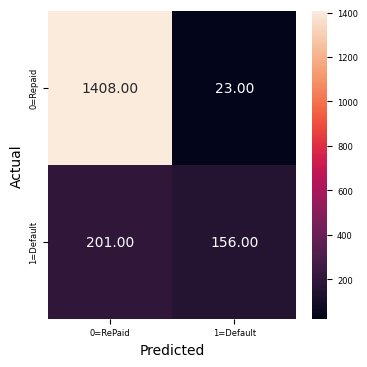

In [ ]:
#Gradient Boosting on test data
y6_test = Grad_classif.predict(x_test)
metrics_score(y_test, y6_test)

The Gradientboost method has a recall score of 0.45. And 197 predicted to repaid that actually defaulted.

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Creating and training XGBoost model
xgb_classif=XGBClassifier(random_state=1)
xgb_classif.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      0.99      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



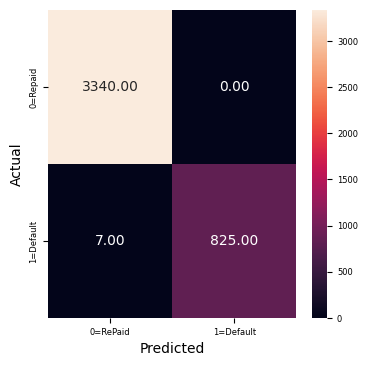

In [ ]:
#xgb boost, checking metrics on train data
y7 = xgb_classif.predict(x_train)

metrics_score(y_train, y7)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1431
           1       0.88      0.62      0.73       357

    accuracy                           0.91      1788
   macro avg       0.90      0.80      0.84      1788
weighted avg       0.91      0.91      0.90      1788



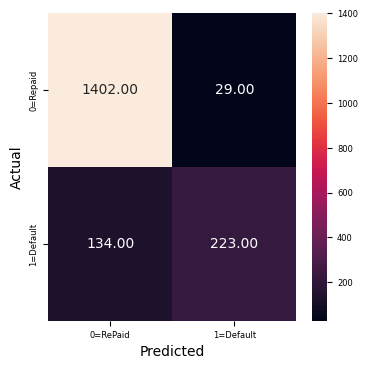

In [ ]:
#xgb boost on test data
y7_test = xgb_classif.predict(x_test)
metrics_score(y_test, y7_test)

The XGBoost method has a recall score of 0.61. And 138 predicted to repaid that actually defaulted.

### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
ada_hyper = {"n_estimators": [50,75,100],
             "learning_rate": [1, 2, 3,4]}

In [ ]:
bag_hyper = {"n_estimators": [10,20,30],
    "max_features": [0.9, 0.2, 0.4, 0.7],
    "max_samples": [0.9, 0.2, 0.4, 0.7],}

In [ ]:
hyper2 = {"n_estimators": [100, 110, 120],
    "max_depth": [None, 2, 4, 6],
    "min_samples_leaf": [1,5, 15, 20, 25],
    "max_features": [1, 0.2, 0.4, 0.7],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

In [ ]:
ens_hyper_params={
    "learning_rate": [1, 0.5, 2],
    'n_estimators':[100, 110, 120],
    'max_depth': [None, 2, 4, 6],
    'max_features':[1, 0.2, 0.4, 0.7]
}

In [ ]:
#hyperparameter tunning Bagging y3
BG_y3_tuned=BaggingClassifier(random_state=1)
#hyperparameter tunning RandomForest y4
RF_y4_tuned=RandomForestClassifier(random_state=1)
#hyperparameter tunning AdaBoost y5
ADB_y5_tuned=AdaBoostClassifier(random_state=1)
#hyperparameter tunning Gradient Boosting y6
GB_y6_tuned=GradientBoostingClassifier(random_state=1)
#hyperparameter tunning XGBoost y7
XGB_y7_tuned=XGBClassifier(random_state=1)

In [ ]:
#Search for best parameters y3
BG_gridsearch=GridSearchCV(BG_y3_tuned, bag_hyper, scoring= 'recall', cv=5)
BG_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'max_features': [0.9, 0.2, 0.4, 0.7],
                         'max_samples': [0.9, 0.2, 0.4, 0.7],
                         'n_estimators': [10, 20, 30]},
             scoring='recall')

In [ ]:
#Search for best parameters y4
RF_gridsearch=GridSearchCV(RF_y4_tuned, hyper2, scoring= 'recall', cv=5)
RF_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', {0: 0.3, 1: 0.7}],
                         'max_depth': [None, 2, 4, 6],
                         'max_features': [1, 0.2, 0.4, 0.7],
                         'min_samples_leaf': [1, 5, 15, 20, 25],
                         'n_estimators': [100, 110, 120]},
             scoring='recall')

In [ ]:
#Search for best parameters y5
ADB_gridsearch=GridSearchCV(ADB_y5_tuned, ada_hyper, scoring= 'recall', cv=5)
ADB_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'learning_rate': [1, 2, 3, 4],
                         'n_estimators': [50, 75, 100]},
             scoring='recall')

In [ ]:
#Search for best parameters y6
GB_gridsearch=GridSearchCV(GB_y6_tuned, ens_hyper_params, scoring= 'recall', cv=5)
GB_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [1, 0.5, 2],
                         'max_depth': [None, 2, 4, 6],
                         'max_features': [1, 0.2, 0.4, 0.7],
                         'n_estimators': [100, 110, 120]},
             scoring='recall')

In [ ]:
#Search for best parameters y7
XGB_gridsearch=GridSearchCV(XGB_y7_tuned, hyper2, scoring= 'recall', cv=5)
XGB_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'class_weight': ['balanced', {0: 0.3, 1: 0.7}],
                         'max_depth': [None, 2, 4, 6],
                         'max_features': [1, 0.2, 0.4, 0.7],
                         'min_samples_leaf': [1, 5, 15, 20, 25],
                         'n_estimators': [100, 110, 120]},
             scoring='recall')

### Fitting the best models

In [ ]:
#fitting tuned bagging model
bg_classifier_best= BG_gridsearch.best_estimator_
bg_classifier_best.fit(x_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

In [ ]:
#fitting tuned random forest model
rf_classifier_best= RF_gridsearch.best_estimator_
rf_classifier_best.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=0.4,
                       min_samples_leaf=20, random_state=1)

In [ ]:
#fitting tuned ADABOost model
adb_classifier_best= ADB_gridsearch.best_estimator_
adb_classifier_best.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=2, random_state=1)

In [ ]:
#fitting tuned Gradiant Boosting model
gb_classifier_best= GB_gridsearch.best_estimator_
gb_classifier_best.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=4, max_features=0.7,
                           n_estimators=120, random_state=1)

In [ ]:
#fitting tuned XGBboost model
xgb_classifier_best= XGB_gridsearch.best_estimator_
xgb_classifier_best.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_features=1,
              max_leaves=None, min_child_weight=None, min_samples_leaf=1,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=120, ...)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1431
           1       0.91      0.57      0.70       357

    accuracy                           0.90      1788
   macro avg       0.90      0.78      0.82      1788
weighted avg       0.90      0.90      0.89      1788



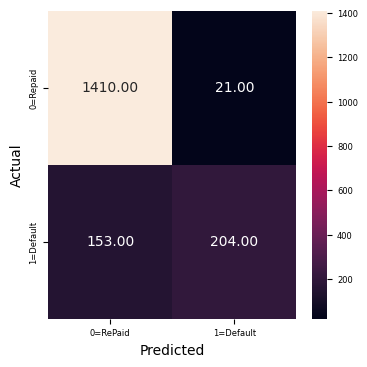

In [ ]:
#Bagging Tuned, prediction on test
y3best_test = bg_classifier_best.predict(x_test)
metrics_score(y_test, y3best_test)

* Tuned Bagging has a recall score of 0.57, and predicted 153 not defaulted who actually defaulted.

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1431
           1       0.54      0.72      0.61       357

    accuracy                           0.82      1788
   macro avg       0.73      0.78      0.75      1788
weighted avg       0.85      0.82      0.83      1788



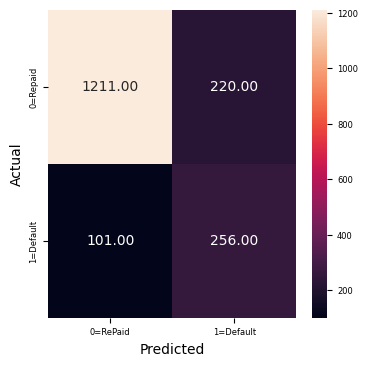

In [ ]:
#Random Forest Tuned, prediction on test
y4best_test = rf_classifier_best.predict(x_test)
metrics_score(y_test, y4best_test)

* Tuned Bagging has a recall score of 0.72, and predicted 100 not defaulted who actually defaulted.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1431
           1       0.20      1.00      0.33       357

    accuracy                           0.20      1788
   macro avg       0.10      0.50      0.17      1788
weighted avg       0.04      0.20      0.07      1788



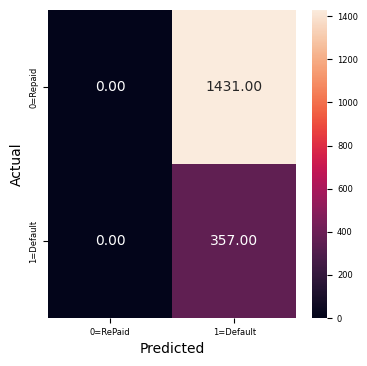

In [ ]:
#AdaBoost Tuned, prediction on test
y5best_test = adb_classifier_best.predict(x_test)
metrics_score(y_test, y5best_test)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.82      0.61      0.70       357

    accuracy                           0.89      1788
   macro avg       0.86      0.79      0.82      1788
weighted avg       0.89      0.89      0.89      1788



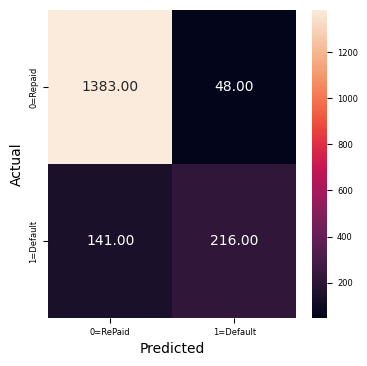

In [ ]:
#Gradient Descent Tuned, prediction on test
y6best_test = gb_classifier_best.predict(x_test)
metrics_score(y_test, y6best_test)

* Tuned Bagging has a recall score of 0.59, and predicted 147 not defaulted who actually defaulted.

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1431
           1       0.88      0.63      0.73       357

    accuracy                           0.91      1788
   macro avg       0.90      0.80      0.84      1788
weighted avg       0.91      0.91      0.90      1788



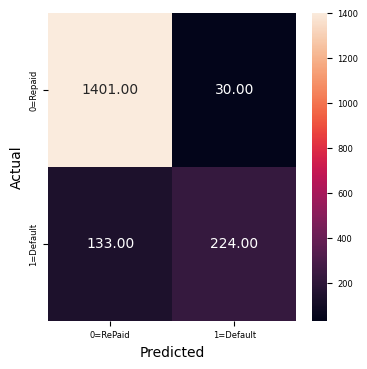

In [ ]:
#XGBoost Tuned, prediction on test
y7best_test = xgb_classifier_best.predict(x_test)
metrics_score(y_test, y7best_test)


* Tuned XGBoost has a recall score of 0.62, and predicted 134 not defaulted who actually defaulted.

In [ ]:
df['BAD'].value_counts()

BAD
0    4771
1    1189
Name: count, dtype: int64

Best model based on recall was: Random Forest , and its most important features are

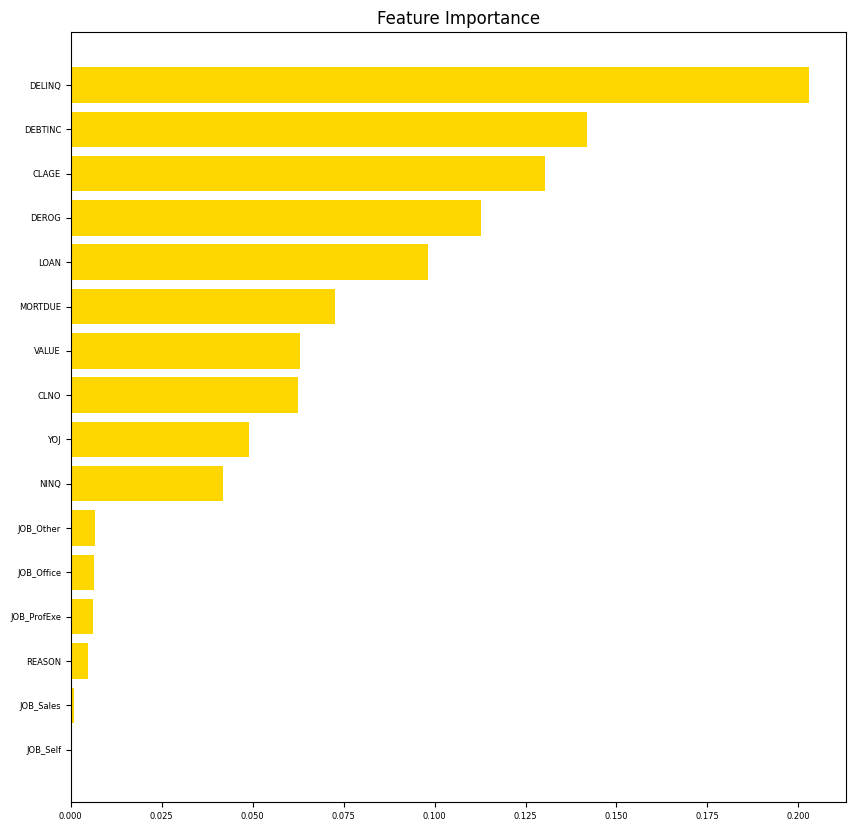

In [ ]:
important_features= rf_classifier_best.feature_importances_
indexs= np.argsort(important_features)
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(features)), important_features[indexs], color='gold', align='center')
plt.yticks(range(len(features)), [features[i] for i in indexs]);

# Final Insights

* There are only 2 object/string, JOB and REASON.
* DEROG, DELINQ, and NINQ, could be seen/treated as categorical variables.
* BAD is a flag variable, or categorical, indicating if the user has defaulted on the loan (1) or if it has payed the loan (0).
* There are a lot of missing values, althoug none of them seem to be greater than 50% of the data, so i will try to treat them.
* Clients who defaulted on a loan had a range of DELINQ from 0-15. Meanwhile those who repaid their loan had a range of DELINQ of 0-5.
* Similarly, clients who defaulted on a loan had a range of DEROG from 0-10. Meanwhile those who repaid their loan had a range of DEROG of 0-6.
* The most common category in JOB is Other, with 40% of the data; the second most common is ProfExe with 21.4%; the third one is office with 15.9%
* There are only 2 categories in reason, 1 is for DebtCon (65.91%) and 2 is HomeImp (29.87).
* The REASON for loan default, DebtCon or HomeImp, is very fairly distributed.
* Sales is the JOB most prone to loan default.
* Loan default is correlated to DELINQ, DEROG, DEBTINC, NINQ. And it is not correlated to CLAGE, LOAN, YOJ, MORTDUE, VALUE.

## From missing values
* only 7 clients who repaid their loan "forgot" or did not input any VALUE of property. Meanwhile, 105 clients who defaulted on a loan did not input any VALUE of property.

* 412 clients who repaid their loan did not input any MORTDUE for their property. Meanwhile, 106 clients who defaulted on a loan did not input any MORTDUE for their property.

* There is a similitude in missing value for defaulted clients on VALUE and MORTDUE, this could be because if you dont own any property, you should not have an MORTDUE.

* 450 clients who repaid their loan did not input any YOJ, years in a job. Meanwhile, 65 clients who defaulted on a loan did not input any YOJ.

* 508 clients who repaid their loan did not input any DELINQ credit lines. Meanwhile, 72 clients who defaulted on a loan did not input any DELINQ credit lines.

* 621 clients who repaid their loan did not input any DEROG cases, related to any delinquency or late payment. Meanwhile, 87 clients who defaulted on a loan did not input any DEROG cases.

* 230 clients who repaid their loan did not input any CLAGE, oldest creditline in months. Meanwhile, 78 clients who defaulted on a loan did not input any CALGE.

* 435 clients who repaid their loan did not input any NINQ: Number of recent credit inquiries. Meanwhile, 75 clients who defaulted on a loan did not input any NINQ.

* 169 clients who repaid their loan did not input any CLNO: Number of recent credit inquiries. Meanwhile, 53 clients who defaulted on a loan did not input any CLNO.

* 481 clients who repaid their loan did not input any DEBTINC: Debt-to-income ratio. Meanwhile, 786 clients who defaulted on a loan did not input any DEBTINC.

## Outliers

* Clage and Debtinc have outlier worth treating. Value has outliers but those are real values so they will not be treated. Mortdue has outliers but they are also real values so they wont be treated either.

* We treated the outliers with the 5th and 95th percentile on all numerical variables. After further analysis. It is believed that VALUE, MORTDUE, and NINQ could be left untreated because they are real possible values.

## Treating Missing Values

* We can see the distribution of the job data in the univariate and bivariate analysis. We filled/imputed the missing values of JOB based on said distribution.

* We can do the same for the other categorical variable, REASON.

* Using KNN, the rest of numerical Missing values are filled and the original patterns of the data has been secured.


**Comparison of various techniques and their relative performance based on Recall:**

Logistic Regression
* Fir LR: Its very bad based on recall, predicting that 277 would repay and they actually defaulted.
* It improved a lot after optimal threshold visualization based on Recall, predicting that 166 would repay and they actually defaulted.


Decision Tree
* Based on recall, the tuned decision tree performed better thsn the logistic refression, with a recall score of 0.74. And 93 predicted to repaid that actually defaulted.


Ensemble Methods
* The bagging method has a recall score of 0.51. And 174 predicted to repaid that actually defaulted.
* The Random Forest method has a recall score of 0.55. And 160 predicted to repaid that actually defaulted.
* The ADAboost method has a recall score of 0.41. And 212 predicted to repaid that actually defaulted.
* The Gradient Boost method has a recall score of 0.45. And 197 predicted to repaid that actually defaulted.
* The XGBoost method has a recall score of 0.61. And 138 predicted to repaid that actually defaulted.

* Tuned Bagging has a recall score of 0.54, and predicted 170 not defaulted who actually defaulted.
* Tuned RandomForest has a recall score of 0.72, and predicted 100 not defaulted who actually defaulted.
* Tuned Gradient Boosting has a recall score of 0.61, and predicted 144 not defaulted who actually defaulted.
* Tuned XGBoost has a recall score of 0.65, and predicted 130 not defaulted who actually defaulted.

**Final Insights**
 * The principal objective for this problem is to focus the measurement of score recall, after training and tunning all the models based on the prefered measurment metric, the best performance is obtained by the Decision Tree, with score of 0.74 and only 93 predicted not to defaulted that actually defaulted. The only disadvantage is that the model could be overfitting. A great advantage is that we can visualize the decision tree.

* The second best option is the Random Forest, this would be a better final decision because it can be more robust to overfitting. With a recall score of 0.72 and only 100 predicted not to defaulted that actually defaulted. The only disadvantage is that de final decision tree cannot be visualized.

* The decision tree visualization is very interesting and insightfull.

* Based on these two solutions, the most importante variables are : DELING, DEBTINC, and CLAGE. Interestingly, the logistic regression puts most of its importance on the JOB_Sales variable. Therefore, a client with high delinquent credit inquieres, derogatory reports is prone to default. PA special attention to those with older credit lines and if their job is in the sales department.

# **Executive Report**

**Executive Summary**
*	The most important findings from the EDA are that the dataset contains a heavy amount of missing values, not enough to drop them but significantly enough to treat them. There are a lot of outliers, and most of the extreme ones are related to clients who have defaulted on a loan. For example, all the data with a value above 50% of the max value in the data set of Debt-to-income have a defaulted status.
*	Our solution, a decision tree, brought us the best solution regarding recall, it gives us the interpretability desired and it can handle extreme values in the data, which are important.
*	Key steps for finding our solution. Treat the missing values without changing the distribution of the original data. Get the correct measurement of performance. Our solution states that the key elements or most important factors from our data are the Derogatory Cases, Debt-to-income ratio, Delinquent inquiries, and the oldest credit line in months.

**Problem and Solution Summary**


* The solution design is to model a decision tree based on recall, therefore the most important key factors should be computational resources and completeness of the data.
*	The key points of the solution would be that it is focused on recall, on false negatives, or minimizing type 2 errors. And that we are prioritizing interpretability for the nature of the problem. This means we will be optimizing on recall, and choosing decision Tree over ensemble methods for interpretation reasons and lack of known computational resources. The decision tree optimized was the one with a higher recall score (0.74) and is the best one for interpretability. Nevertheless, the second best option is a random forest/XGBoost, where we lack a little bit of interpretability but gain major performance on other prediction metrics.
*	Since our problem is to predict when a client will default, a model will have correct predictions: a client will default and it will indeed default, a client will repay the loan and indeed repay it. Both of these predictions represent no losses for the bank. A model can also have wrong predictions, i.g., the model will predict a client will default but it actually repays the loan, this is a type 1 error or a false positive, which means we made a wrong decision but in the context of our problem that is not a great issue, we did not give out a loan, so we loose on potential profit but we did not give anything from the beginning; other times the model will predict that the client will repay but it defaults on the loan, this is where we will be prioritizing because giving out a loan and not getting repaid is what we consider the greatest loss. This is a type 2 error or a false negative, this means that we made a wrong prediction and that represents major losses for the bank or company. In terms of the client, a false positive is not good for them because they won't be given the loan they need, but it does not represent a direct loss for the bank. A false negative represents a bad credit score for the user, the possibility of not getting a loan in the future and it is a direct loss for the bank.


**Recommendations For Implementation**
*	For implementation I would recommend more data to get more information and get better predictions.
*	And track the solution to make any adjustments to the parameters of the model, there are some values that change over time in our data set, Years on the current job, oldest credit line in months, debt-to-income ratio, number of recent credit inquiries, the number of delinquent credit lines and the derogatory reports, and they are part of the most important features given out by our solution.
*	Actions for Stakeholders
  -	Check the outliers in the data, to determine if they are mistakes, or real.
  -	Create something so that the new data sets focus on not getting missing values. Encourage the clients to input all the information via something.
  -	The most important factors to have in mind are: Derog, Clage, Debtinc, and Delinq, this could be analyzed along with the decision map given by the decision tree.
*	Expected Benefit/Cost:
  -	We Focused on recall, it is computationally friendly, and it is interpretable. We predicted 266 defaulted plus 91 that would repay but that defaulted (false negatives).
  -	We will lose a potential of 514 clients by predicting that they will default and they don’t default. But we will not lose any profit by predicting that only 91 clients will pay the loan when they default.
  -	However, with a more computationally expensive environment, such as having our resources in the cloud, we could implement the ensemble methods and tune them in less time. This will boost a lot on our false positives, this is not our objective, but for example, with a recall score of 0.72, Random Forest has 101 predictions of clients who will repay but default (false negatives) but 220 predictions of clients who will default but pay. With a recall score of 0.63, XGBoost predicts 133 clients who will repay but default on a loan, but only 30 clients who will default and they actually pay.  
*	Further Analysis: Since we don’t have data such as the history of payments, length or duration of the loan, and rate of pay, we can’t have any insights on the actual profit made. A recommendation for the future would be to implement this into the data set. Just to have more information.
